In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

## Social Media Tourism

### Data Exploration and Data Pre Processing

In [2]:
df = pd.read_csv(r"C:\Users\Ckhop\Dropbox\My PC (LAPTOP-48O7E0E8)\Downloads\Social Media_Tourism_Project\Social Media Data for DSBA.csv")

In [3]:
df.head(10)

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6
5,1000006,No,240.0,iOS,35175.0,1,2,Financial,79.0,3068,0,No,13,No,3,0,8
6,1000007,No,NaN,iOS and Android,46340.0,1,Three,Medical,81.0,2670,4,Yes,20,Yes,1,3,12
7,1000008,No,225.0,iOS and Android,NaN,24,1,Financial,67.0,2693,1,No,22,Yes,2,1,1
8,1000009,No,285.0,iOS,7560.0,23,3,Financial,44.0,9526,0,No,21,Yes,2,0,10
9,1000010,No,270.0,iOS and Android,45465.0,27,3,NaN,94.0,5237,6,No,13,No,2,2,17


In [4]:
df.tail(10)

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
11750,1011751,No,231.0,Tab,16423.0,28,4,Historical site,96.0,3845,1,No,26,No,2,0,12
11751,1011752,Yes,383.0,Tab,14399.0,28,3,Big Cities,58.0,10910,6,Yes,28,No,2,1,23
11752,1011753,No,302.0,Tab,25317.0,24,1,Big Cities,79.0,12093,0,No,24,No,1,1,29
11753,1011754,No,247.0,Mobile,11418.0,5,3,Historical site,99.0,9983,1,No,28,No,2,0,16
11754,1011755,No,210.0,Tab,40886.0,5,3,Other,53.0,3024,2,No,32,No,4,0,14
11755,1011756,No,279.0,Laptop,30987.0,23,2,Historical site,58.0,2616,4,No,36,No,3,1,23
11756,1011757,No,305.0,Tab,21510.0,6,1,Historical site,55.0,10041,4,No,30,No,1,1,11
11757,1011758,No,214.0,Tab,5478.0,4,3,Beach,103.0,6203,3,Yes,40,Yes,2,1,12
11758,1011759,No,382.0,Laptop,35851.0,2,3,Historical site,83.0,5444,3,No,32,No,4,0,20
11759,1011760,No,270.0,Tab,22025.0,8,3,Historical site,104.0,4470,2,No,29,No,1,0,14


In [5]:
df.dtypes

UserID                                            int64
Taken_product                                    object
Yearly_avg_view_on_travel_page                  float64
preferred_device                                 object
total_likes_on_outstation_checkin_given         float64
yearly_avg_Outstation_checkins                   object
member_in_family                                 object
preferred_location_type                          object
Yearly_avg_comment_on_travel_page               float64
total_likes_on_outofstation_checkin_received      int64
week_since_last_outstation_checkin                int64
following_company_page                           object
montly_avg_comment_on_company_page                int64
working_flag                                     object
travelling_network_rating                         int64
Adult_flag                                        int64
Daily_Avg_mins_spend_on_traveling_page            int64
dtype: object

In [6]:
df.rename(columns={'Taken_product': "Buy_ticket"}, inplace=True)

In [7]:
df.head(10)

,UserID,Buy_ticket,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6
5,1000006,No,240.0,iOS,35175.0,1,2,Financial,79.0,3068,0,No,13,No,3,0,8
6,1000007,No,NaN,iOS and Android,46340.0,1,Three,Medical,81.0,2670,4,Yes,20,Yes,1,3,12
7,1000008,No,225.0,iOS and Android,NaN,24,1,Financial,67.0,2693,1,No,22,Yes,2,1,1
8,1000009,No,285.0,iOS,7560.0,23,3,Financial,44.0,9526,0,No,21,Yes,2,0,10
9,1000010,No,270.0,iOS and Android,45465.0,27,3,NaN,94.0,5237,6,No,13,No,2,2,17


In [8]:
df.tail(10)

,UserID,Buy_ticket,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
11750,1011751,No,231.0,Tab,16423.0,28,4,Historical site,96.0,3845,1,No,26,No,2,0,12
11751,1011752,Yes,383.0,Tab,14399.0,28,3,Big Cities,58.0,10910,6,Yes,28,No,2,1,23
11752,1011753,No,302.0,Tab,25317.0,24,1,Big Cities,79.0,12093,0,No,24,No,1,1,29
11753,1011754,No,247.0,Mobile,11418.0,5,3,Historical site,99.0,9983,1,No,28,No,2,0,16
11754,1011755,No,210.0,Tab,40886.0,5,3,Other,53.0,3024,2,No,32,No,4,0,14
11755,1011756,No,279.0,Laptop,30987.0,23,2,Historical site,58.0,2616,4,No,36,No,3,1,23
11756,1011757,No,305.0,Tab,21510.0,6,1,Historical site,55.0,10041,4,No,30,No,1,1,11
11757,1011758,No,214.0,Tab,5478.0,4,3,Beach,103.0,6203,3,Yes,40,Yes,2,1,12
11758,1011759,No,382.0,Laptop,35851.0,2,3,Historical site,83.0,5444,3,No,32,No,4,0,20
11759,1011760,No,270.0,Tab,22025.0,8,3,Historical site,104.0,4470,2,No,29,No,1,0,14


In [9]:
df.dtypes

UserID                                            int64
Buy_ticket                                       object
Yearly_avg_view_on_travel_page                  float64
preferred_device                                 object
total_likes_on_outstation_checkin_given         float64
yearly_avg_Outstation_checkins                   object
member_in_family                                 object
preferred_location_type                          object
Yearly_avg_comment_on_travel_page               float64
total_likes_on_outofstation_checkin_received      int64
week_since_last_outstation_checkin                int64
following_company_page                           object
montly_avg_comment_on_company_page                int64
working_flag                                     object
travelling_network_rating                         int64
Adult_flag                                        int64
Daily_Avg_mins_spend_on_traveling_page            int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Buy_ticket                                    11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [11]:
df.shape

(11760, 17)

In [12]:
df.describe()

,UserID,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
count,1.176000e+04,11179.000000,11379.000000,11554.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000
mean,1.005880e+06,280.830844,28170.481765,74.790029,6531.699065,3.203571,28.661565,2.712245,0.793878,13.817432
std,3.394964e+03,68.182958,14385.032134,24.026650,4706.613785,2.616365,48.660504,1.080887,0.851823,9.070657
min,1.000001e+06,35.000000,3570.000000,3.000000,1009.000000,0.000000,11.000000,1.000000,0.000000,0.000000
25%,1.002941e+06,232.000000,16380.000000,57.000000,2940.750000,1.000000,17.000000,2.000000,0.000000,8.000000
50%,1.005880e+06,271.000000,28076.000000,75.000000,4948.000000,3.000000,22.000000,3.000000,1.000000,12.000000
75%,1.008820e+06,324.000000,40525.000000,92.000000,8393.250000,5.000000,27.000000,4.000000,1.000000,18.000000
max,1.011760e+06,464.000000,252430.000000,815.000000,20065.000000,11.000000,500.000000,4.000000,3.000000,270.000000


In [13]:
df.isnull().sum()

UserID                                            0
Buy_ticket                                        0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

#### Columns containing missing Values

In [14]:
miss_val_col = []
for col in df.columns:
    if df[col].isnull().sum() != 0:
        miss_val_col.append(col)

In [15]:
#Below are the columns which contain the missig values

miss_val_col

['Yearly_avg_view_on_travel_page',
 'preferred_device',
 'total_likes_on_outstation_checkin_given',
 'yearly_avg_Outstation_checkins',
 'preferred_location_type',
 'Yearly_avg_comment_on_travel_page',
 'following_company_page']

### Univariate Analysis

#### Numerical Variables

Text(0.5, 1.0, 'Avg View On travel page yearly')

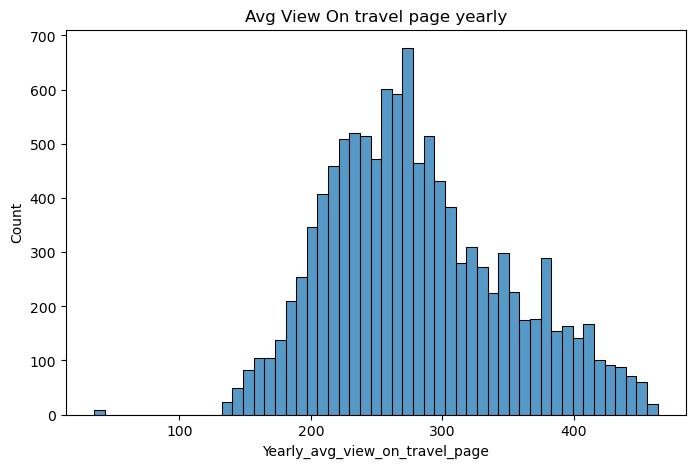

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['Yearly_avg_view_on_travel_page'])
plt.title('Avg View On travel page yearly')

Text(0.5, 1.0, 'Total number of likes given by a user')

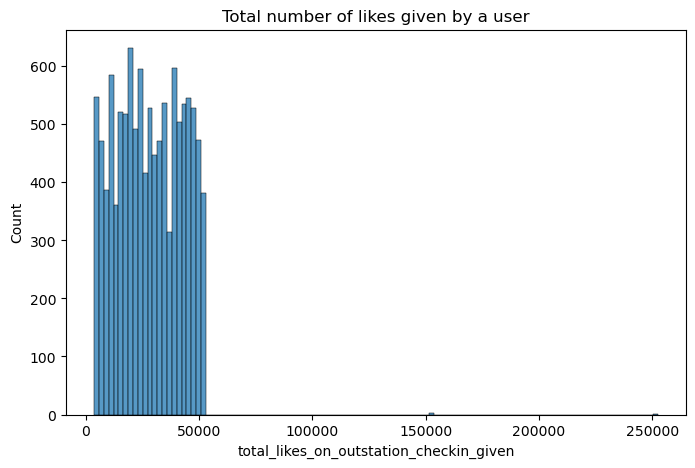

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df['total_likes_on_outstation_checkin_given'])
plt.title('Total number of likes given by a user')

Text(0.5, 1.0, 'Avg number of comments on travel page yearly')

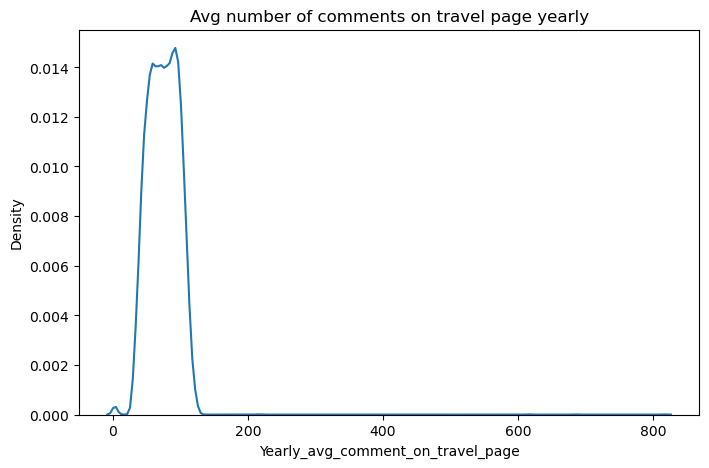

In [18]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Yearly_avg_comment_on_travel_page'])
plt.title('Avg number of comments on travel page yearly')

Text(0.5, 1.0, 'Total number of likes received by users')

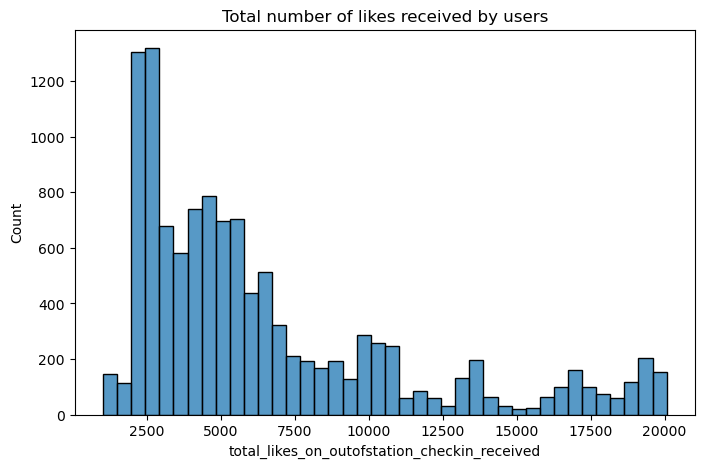

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['total_likes_on_outofstation_checkin_received'])
plt.title('Total number of likes received by users')

Text(0.5, 1.0, 'Week since last outstation checked')

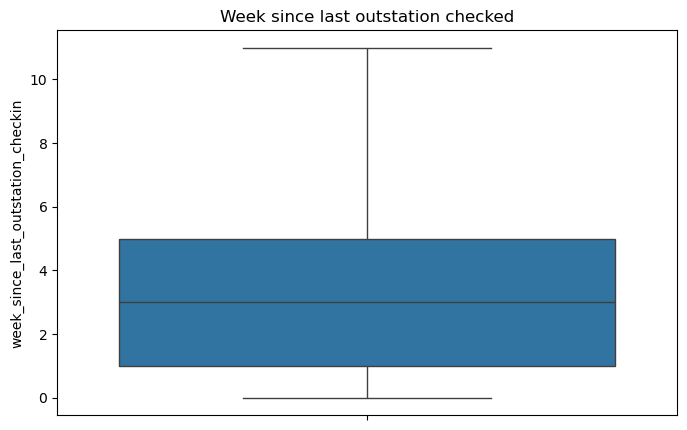

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(df['week_since_last_outstation_checkin'])
plt.title('Week since last outstation checked')

Text(0.5, 1.0, 'Avg comment on company page monthly')

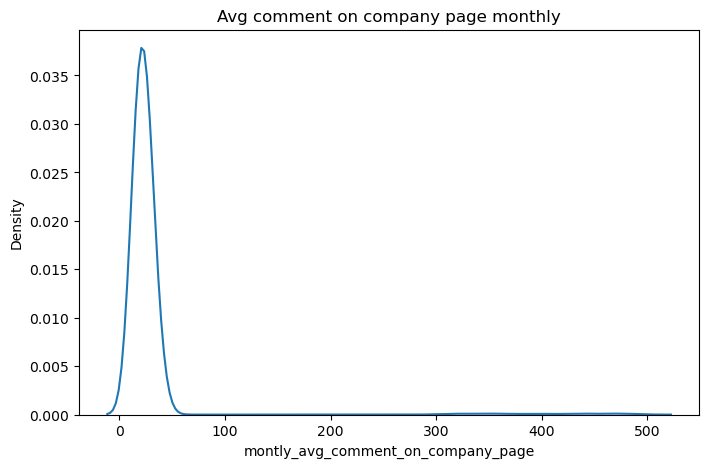

In [21]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['montly_avg_comment_on_company_page'])
plt.title('Avg comment on company page monthly')

Text(0.5, 1.0, 'User friends who like traveling (1 - high, 4 - low)')

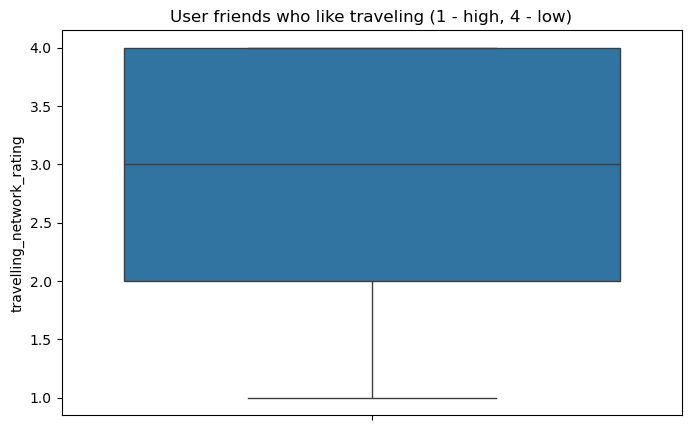

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(df['travelling_network_rating'])
plt.title('User friends who like traveling (1 - high, 4 - low)')

Text(0.5, 1.0, 'Average time spend on the company page by user on daily basis')

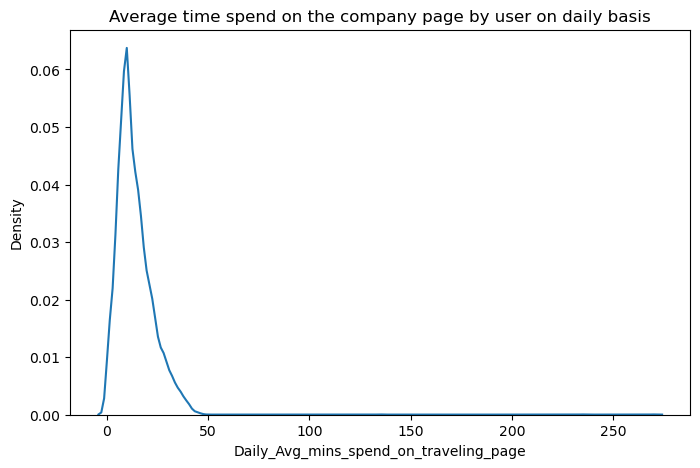

In [23]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Daily_Avg_mins_spend_on_traveling_page'])
plt.title('Average time spend on the company page by user on daily basis')

#### Categorical Variables

Text(0.5, 1.0, 'Whether people will buy tickets next month or not')

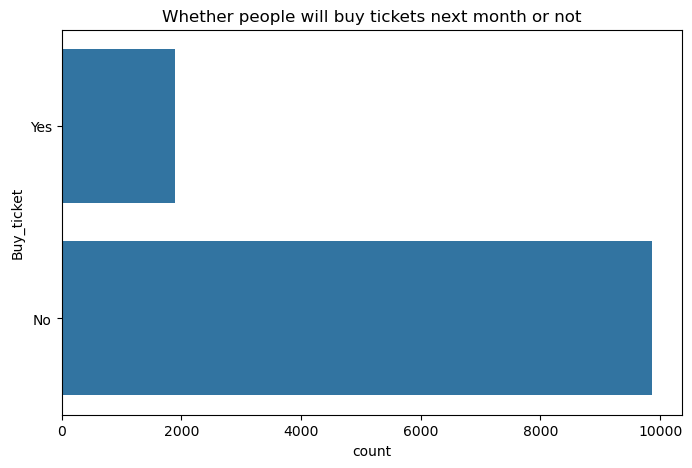

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(df['Buy_ticket'])
plt.title('Whether people will buy tickets next month or not')

Text(0.5, 1.0, 'Preferred device of users')

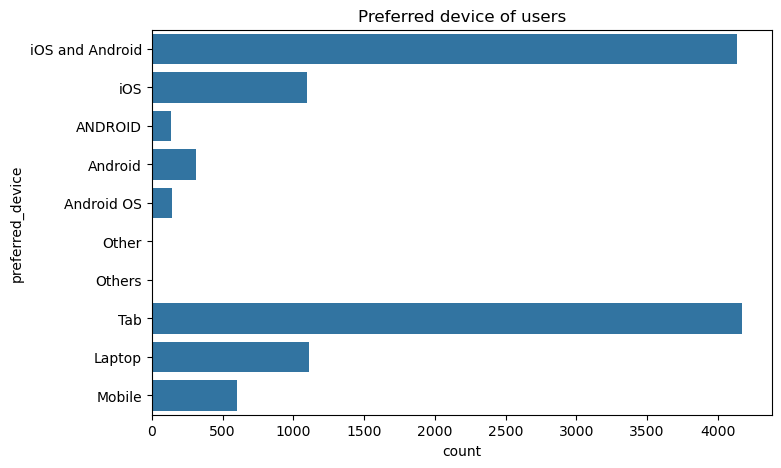

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(df['preferred_device'])
plt.title('Preferred device of users')

In [26]:
df.preferred_device.value_counts()

preferred_device
Tab                4172
iOS and Android    4134
Laptop             1108
iOS                1095
Mobile              600
Android             315
Android OS          145
ANDROID             134
Other                 2
Others                2
Name: count, dtype: int64

In [27]:
# Replace 'Other' with 'Others' 

df['preferred_device'] =  df['preferred_device'].replace('Other', 'Others')
df.preferred_device.value_counts()

preferred_device
Tab                4172
iOS and Android    4134
Laptop             1108
iOS                1095
Mobile              600
Android             315
Android OS          145
ANDROID             134
Others                4
Name: count, dtype: int64

In [28]:
df['preferred_device'] =  df['preferred_device'].replace(['ANDROID', 'Android OS'], 'Android')
df.preferred_device.value_counts()

preferred_device
Tab                4172
iOS and Android    4134
Laptop             1108
iOS                1095
Mobile              600
Android             594
Others                4
Name: count, dtype: int64

Text(0.5, 1.0, 'Preferred device of users')

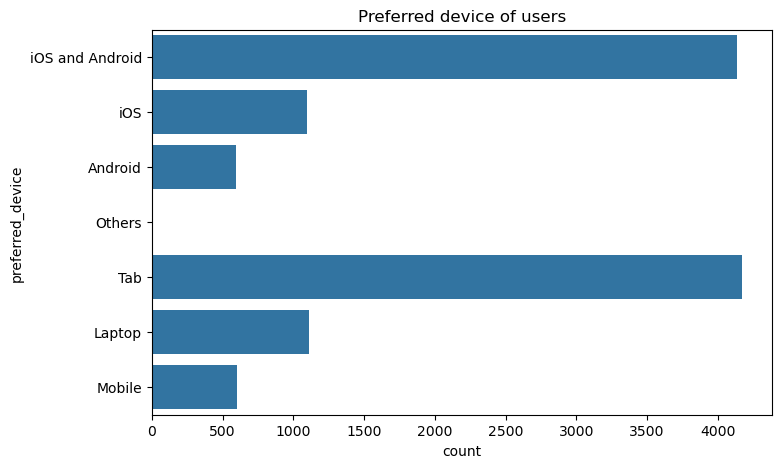

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(df['preferred_device'])
plt.title('Preferred device of users')

Text(0.5, 1.0, 'Average number of out of station check-in done by user')

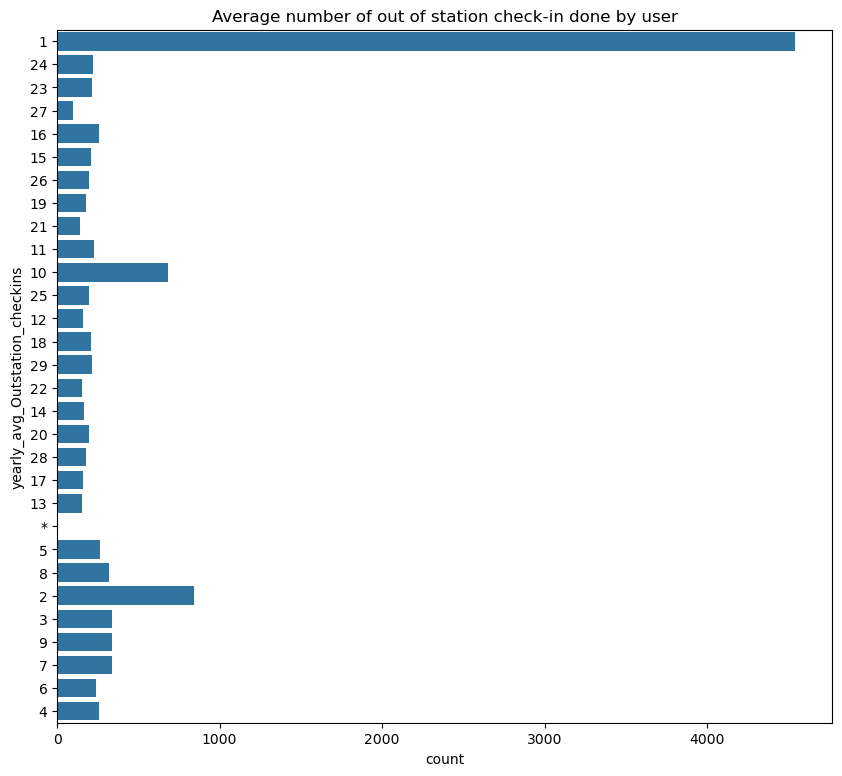

In [30]:
plt.figure(figsize=(10,9))
sns.countplot(df['yearly_avg_Outstation_checkins'])
plt.title('Average number of out of station check-in done by user')

In [31]:
df['yearly_avg_Outstation_checkins'].unique()

array(['1', '24', '23', '27', '16', '15', '26', '19', '21', '11', '10',
       '25', '12', '18', '29', nan, '22', '14', '20', '28', '17', '13',
       '*', '5', '8', '2', '3', '9', '7', '6', '4'], dtype=object)

In [32]:
df['yearly_avg_Outstation_checkins'].value_counts() 

yearly_avg_Outstation_checkins
1     4543
2      844
10     682
9      340
7      336
3      336
8      320
5      261
4      256
16     255
6      236
11     229
24     223
29     215
23     215
18     208
15     206
26     199
20     199
25     198
28     180
19     176
14     167
17     160
12     159
22     152
13     150
21     143
27      96
*        1
Name: count, dtype: int64

In [33]:
row_to_drop = df[df.yearly_avg_Outstation_checkins == '*'].index

df = df.drop(row_to_drop)

In [34]:
df.reset_index(drop=True, inplace=True)

df.yearly_avg_Outstation_checkins.value_counts()

# We have dropped the "*" value from the data set

yearly_avg_Outstation_checkins
1     4543
2      844
10     682
9      340
7      336
3      336
8      320
5      261
4      256
16     255
6      236
11     229
24     223
23     215
29     215
18     208
15     206
20     199
26     199
25     198
28     180
19     176
14     167
17     160
12     159
22     152
13     150
21     143
27      96
Name: count, dtype: int64

Text(0.5, 1.0, 'Average number of out of station check-in done by user')

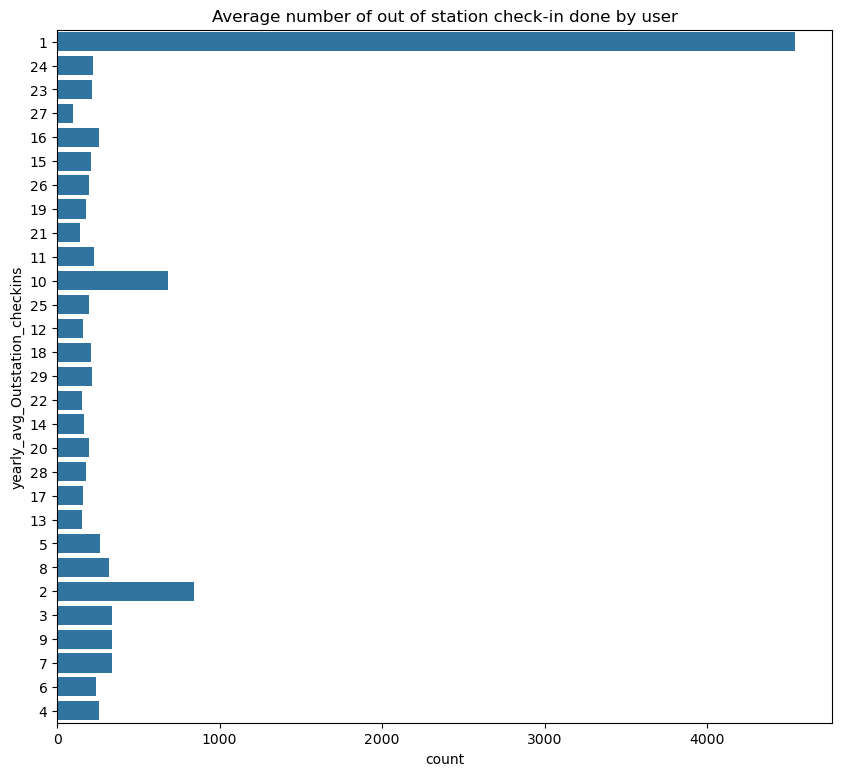

In [35]:
plt.figure(figsize=(10,9))
sns.countplot(df['yearly_avg_Outstation_checkins'])
plt.title('Average number of out of station check-in done by user')

<Axes: xlabel='count', ylabel='member_in_family'>

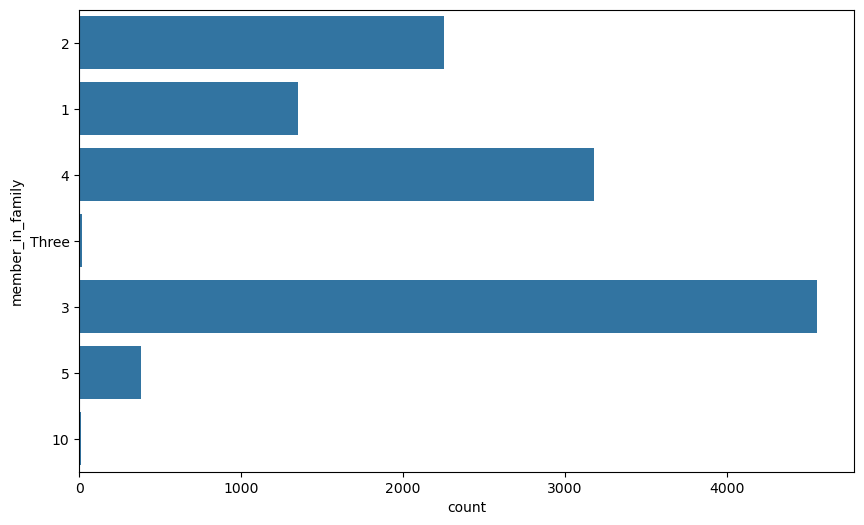

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(df['member_in_family'])

In [37]:
df['member_in_family'].unique()

array(['2', '1', '4', 'Three', '3', '5', '10'], dtype=object)

In [38]:
df.member_in_family.value_counts()

member_in_family
3        4561
4        3183
2        2256
1        1349
5         384
Three      15
10         11
Name: count, dtype: int64

In [39]:
# Let's replace 'Three' with '3' in the dataset

df['member_in_family'] = df['member_in_family'].replace('Three', '3')

In [40]:
df['member_in_family'].unique()

array(['2', '1', '4', '3', '5', '10'], dtype=object)

In [41]:
df['member_in_family'].value_counts()

member_in_family
3     4576
4     3183
2     2256
1     1349
5      384
10      11
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='member_in_family'>

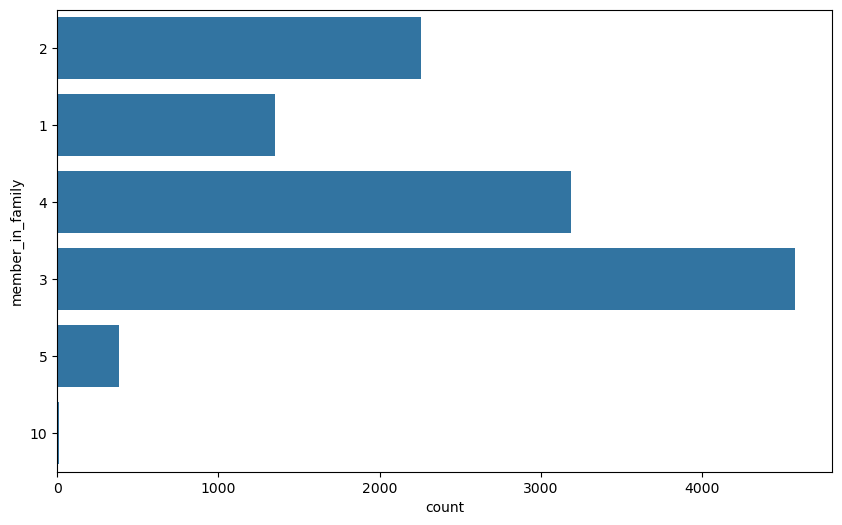

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(df['member_in_family'])

In [43]:
df['member_in_family'].value_counts()

member_in_family
3     4576
4     3183
2     2256
1     1349
5      384
10      11
Name: count, dtype: int64

Text(0.5, 1.0, 'Preferred type of the location for travelling of user')

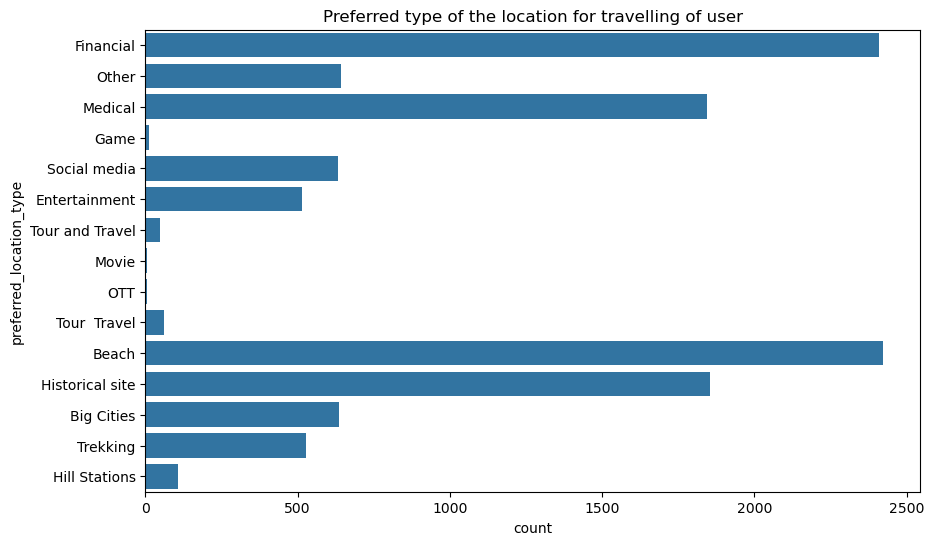

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(df['preferred_location_type'])
plt.title('Preferred type of the location for travelling of user')

In [45]:
df.preferred_location_type.value_counts()

preferred_location_type
Beach              2424
Financial          2408
Historical site    1856
Medical            1845
Other               643
Big Cities          636
Social media        633
Trekking            528
Entertainment       516
Hill Stations       108
Tour  Travel         60
Tour and Travel      47
Game                 12
OTT                   7
Movie                 5
Name: count, dtype: int64

In [46]:
# Let's replace 'Tour Travel' with 'Tour and Travel' 

df['preferred_location_type'] = df['preferred_location_type'].replace('Tour  Travel', 'Tour and Travel')

# Let's replace 'Game', 'OTT' and 'Movie' with 'Other'.

df['preferred_location_type'] = df['preferred_location_type'].replace(['Game', 'OTT', 'Movie'], 'Other')

In [47]:
df.preferred_location_type.value_counts()

preferred_location_type
Beach              2424
Financial          2408
Historical site    1856
Medical            1845
Other               667
Big Cities          636
Social media        633
Trekking            528
Entertainment       516
Hill Stations       108
Tour and Travel     107
Name: count, dtype: int64

Text(0.5, 1.0, 'Preferred type of the location for travelling of user')

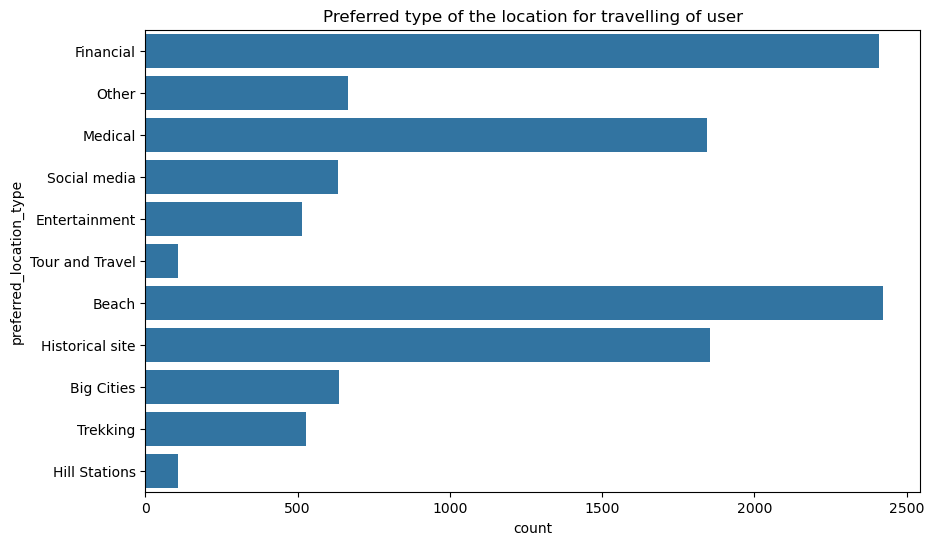

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(df['preferred_location_type'])
plt.title('Preferred type of the location for travelling of user')

<Axes: xlabel='count', ylabel='following_company_page'>

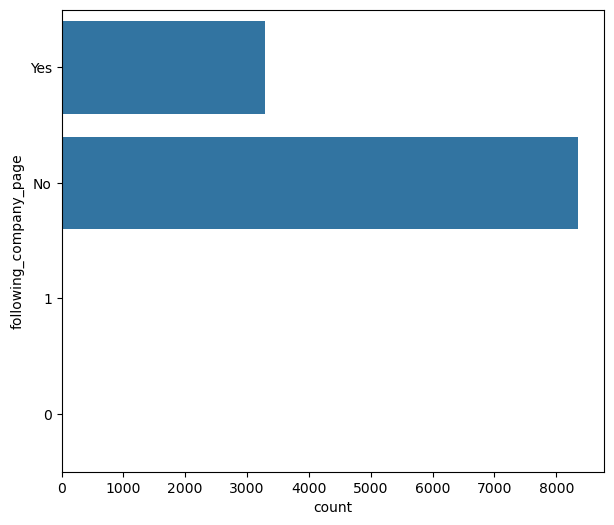

In [49]:
plt.figure(figsize=(7,6))
sns.countplot(df['following_company_page'])

In [50]:
df.following_company_page.value_counts()

following_company_page
No     8354
Yes    3285
1        12
0         5
Name: count, dtype: int64

In [51]:
# Let's replace 0 with 'No' 

df['following_company_page'] = df['following_company_page'].replace(['0', '1'], ['No','Yes'])

In [52]:
df['following_company_page'].value_counts()

following_company_page
No     8359
Yes    3297
Name: count, dtype: int64

Text(0.5, 1.0, 'User follow the company page or not')

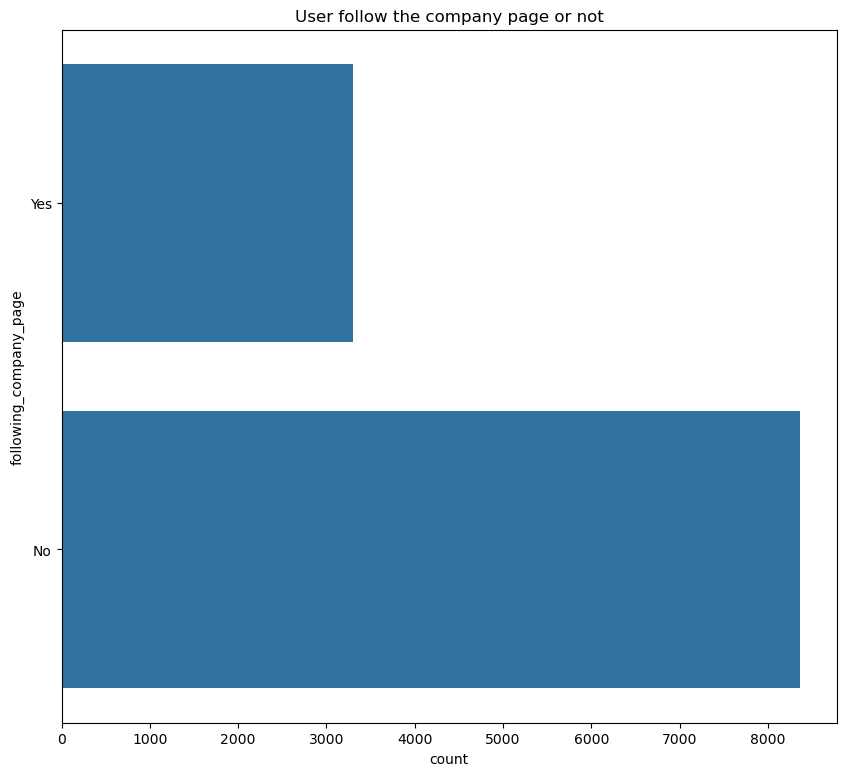

In [53]:
plt.figure(figsize=(10,9))
sns.countplot(df['following_company_page'])
plt.title('User follow the company page or not')

<Axes: xlabel='count', ylabel='working_flag'>

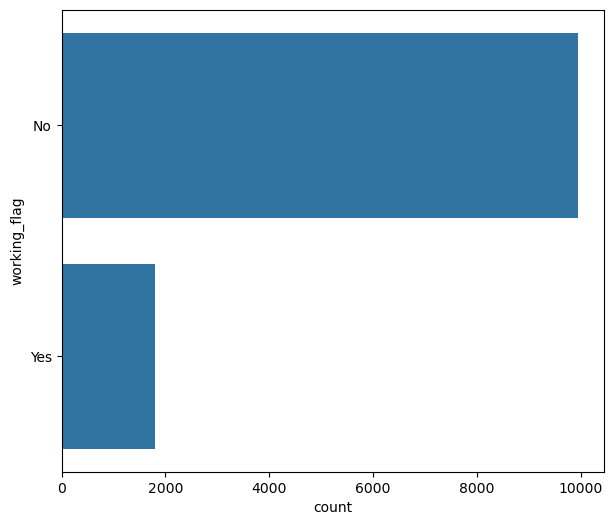

In [54]:
plt.figure(figsize=(7,6))
sns.countplot(df['working_flag'])

In [55]:
df.working_flag.value_counts()

working_flag
No     9952
Yes    1807
Name: count, dtype: int64

## Bivariate Analysis

Text(0.5, 1.0, 'Relationship between daily time spent on trav. page and tickets bought (or not)')

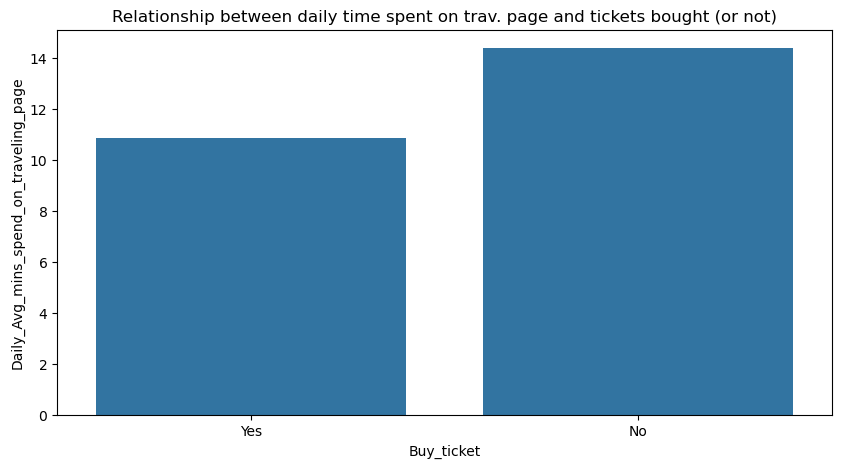

In [56]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Buy_ticket', y='Daily_Avg_mins_spend_on_traveling_page', ci=False)
plt.title('Relationship between daily time spent on trav. page and tickets bought (or not)')

In [57]:
df['preferred_device'].value_counts()

preferred_device
Tab                4172
iOS and Android    4133
Laptop             1108
iOS                1095
Mobile              600
Android             594
Others                4
Name: count, dtype: int64

In [58]:
# We are gonna replace 'ANDROID ', 'Android OS' with 'Android'

df['preferred_device'] = df['preferred_device'].replace(['ANDROID', 'Android OS'], 'Android')
df.preferred_device.value_counts()

# Since there only 4 'Others' values they are insignificant among 11,000 records, hence we will drop them
drop_other = df[df['preferred_device'] == 'Others'].index
df = df.drop(drop_other)

Text(0.5, 1.0, 'Number of preferred devices')

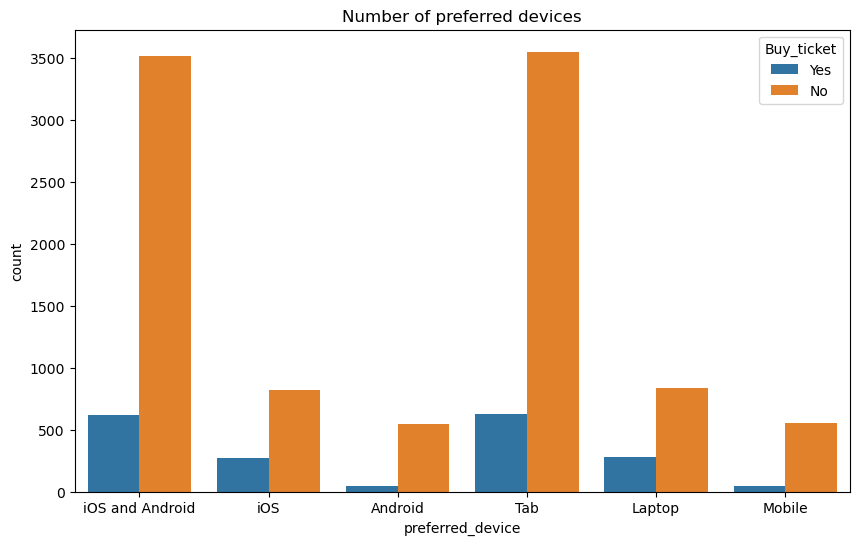

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='preferred_device', hue='Buy_ticket')
plt.title('Number of preferred devices')

Text(0.5, 1.0, 'Weeks since user went out of town and their traveling network rating')

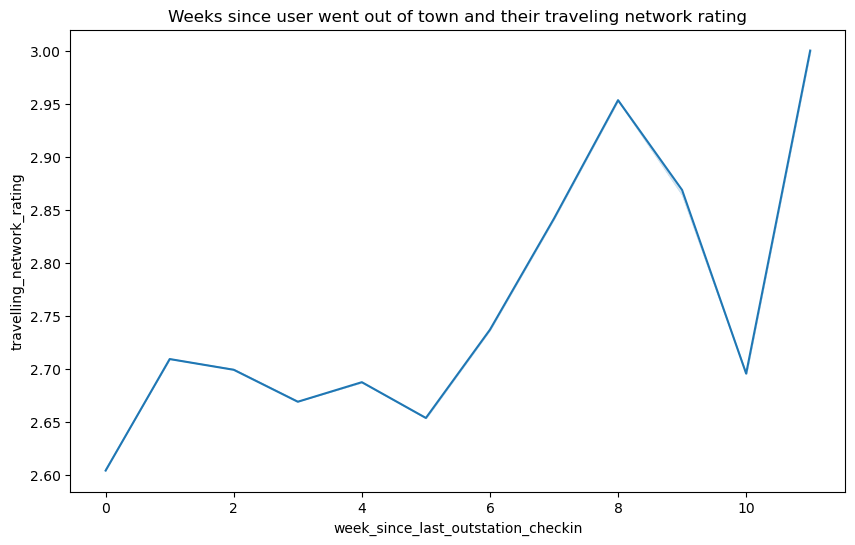

In [60]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='week_since_last_outstation_checkin', y='travelling_network_rating', ci=False, markers='o')
plt.title('Weeks since user went out of town and their traveling network rating')

In [61]:
# Changed the data type of the below variable

df['member_in_family'] = df.member_in_family.astype('int')

Text(0.5, 1.0, 'Total members in family and preferred loc type')

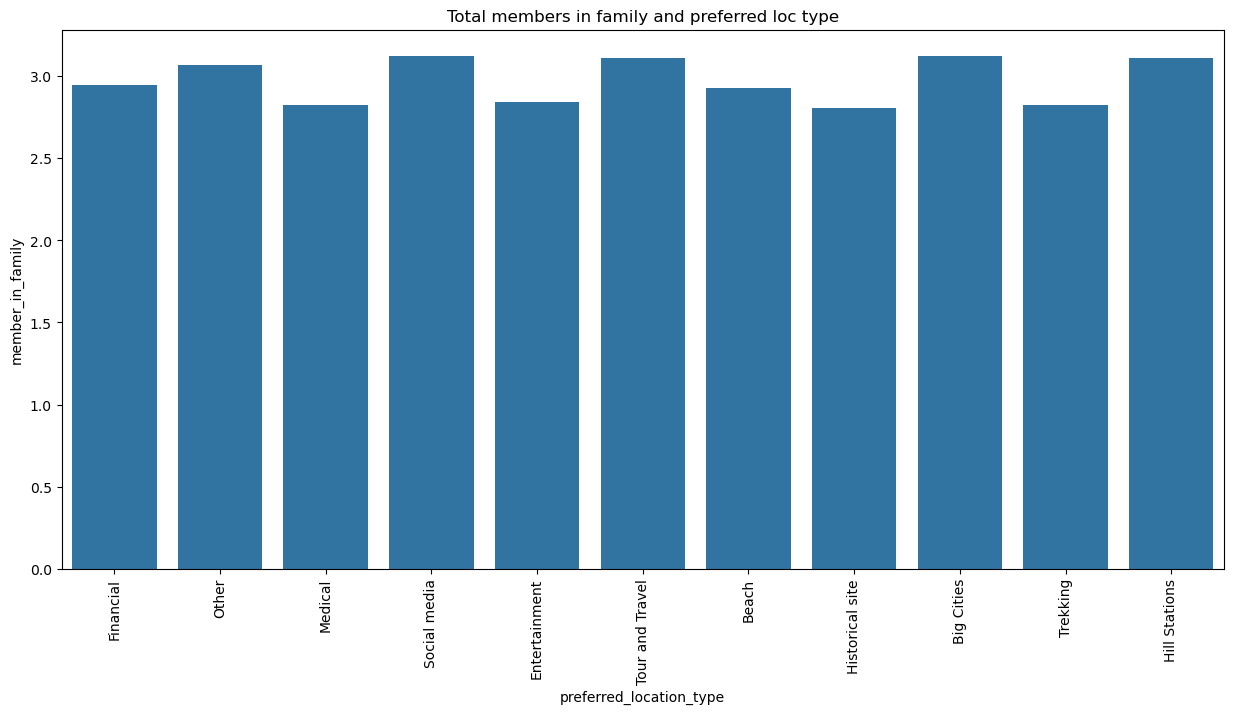

In [62]:
plt.figure(figsize=(15,7))
sns.barplot(data=df, x='preferred_location_type', y='member_in_family', ci=False)
plt.xticks(rotation=90)
plt.title('Total members in family and preferred loc type')

In [63]:
gg = df['yearly_avg_Outstation_checkins'].dtypes
print(f'The data type of the varible yearly_avg_Outstation_checkins : {gg}')

The data type of the varible yearly_avg_Outstation_checkins : object


In [64]:
# Lets change the data types of some variables

df['yearly_avg_Outstation_checkins'] = df.yearly_avg_Outstation_checkins.astype('float')

In [65]:
gf = df['yearly_avg_Outstation_checkins'].dtypes
print(f'The data type of the varible yearly_avg_Outstation_checkins : {gf}')

The data type of the varible yearly_avg_Outstation_checkins : float64


<Axes: xlabel='yearly_avg_Outstation_checkins', ylabel='travelling_network_rating'>

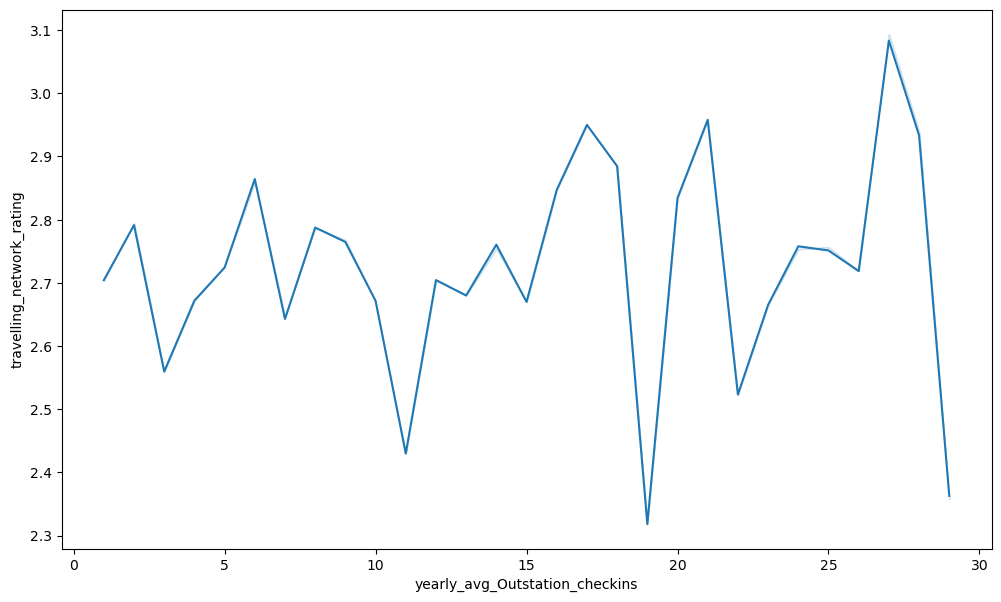

In [66]:
plt.figure(figsize=(12,7))
sns.lineplot(data=df, y='travelling_network_rating', x='yearly_avg_Outstation_checkins', ci=False)

<Axes: >

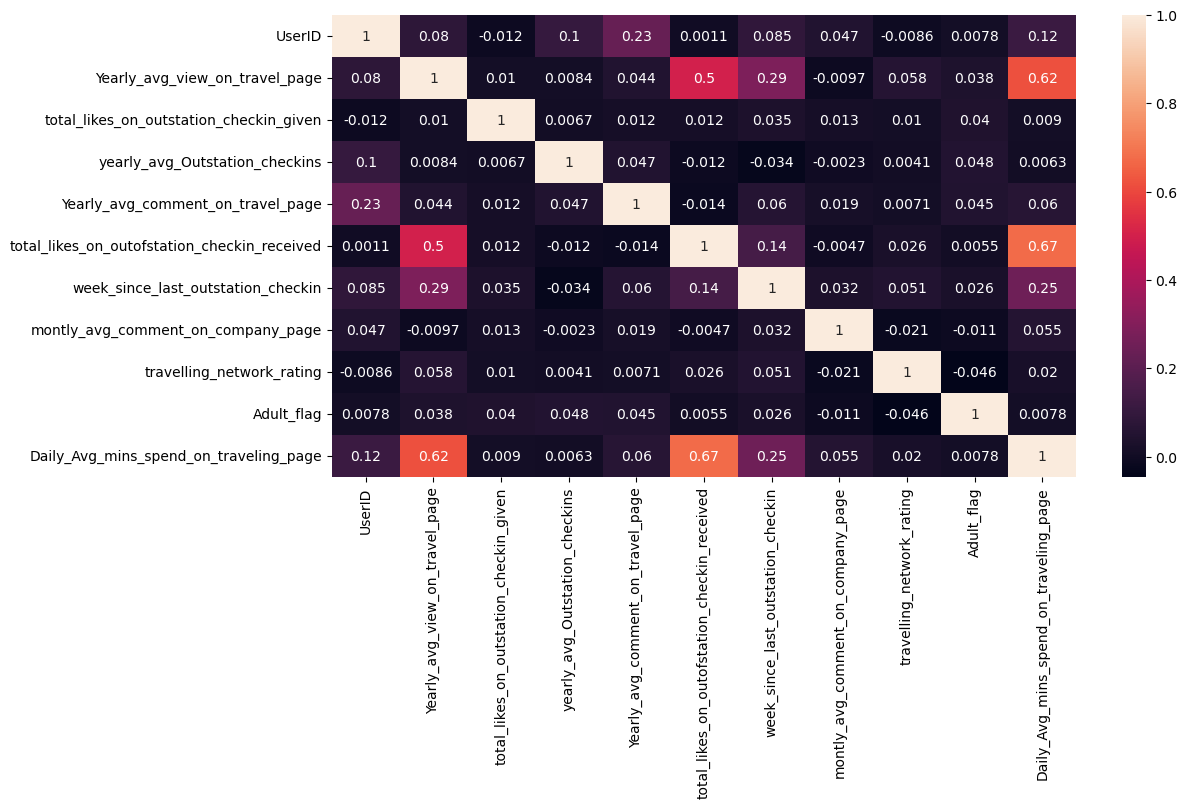

In [67]:
only_num_cols = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,6))
sns.heatmap(data=only_num_cols.corr(), annot=True)

In [68]:
df['Buy_ticket'] = pd.get_dummies(df['Buy_ticket'], drop_first=True)

In [69]:
df['Buy_ticket'].value_counts()

Buy_ticket
False    9860
True     1895
Name: count, dtype: int64

In [70]:
df['Buy_ticket'] = df['Buy_ticket'].astype('int')

In [71]:
df['Buy_ticket'].value_counts()

Buy_ticket
0    9860
1    1895
Name: count, dtype: int64

#### Above we converted the 'True' and 'False' values of the variable 'Buy_ticket' into 0 and 1 respectively.

In [72]:
df['following_company_page'] = pd.get_dummies(df['following_company_page'], drop_first=True)

In [73]:
df['following_company_page'].value_counts()

following_company_page
False    8460
True     3295
Name: count, dtype: int64

In [74]:
df['following_company_page'] = df['following_company_page'].astype('int')

In [75]:
df['following_company_page'].value_counts()

following_company_page
0    8460
1    3295
Name: count, dtype: int64

#### Above we converted the 'True' and 'False' values of the variable 'following_company_page' into 0 and 1 respectively.

In [76]:
df['working_flag'] = pd.get_dummies(df['working_flag'], drop_first=True)

In [77]:
df['working_flag'].value_counts()

working_flag
False    9949
True     1806
Name: count, dtype: int64

In [78]:
df['working_flag'] = df['working_flag'].astype('int')

In [79]:
df['working_flag'].value_counts()

working_flag
0    9949
1    1806
Name: count, dtype: int64

#### Above we converted the 'True' and 'False' values of the variable 'following_company_page' into 0 and 1 respectively.

In [80]:
df.head()

,UserID,Buy_ticket,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,1,307.0,iOS and Android,38570.0,1.0,2,Financial,94.0,5993,8,1,11,0,1,0,8
1,1000002,0,367.0,iOS,9765.0,1.0,1,Financial,61.0,5130,1,0,23,1,4,1,10
2,1000003,1,277.0,iOS and Android,48055.0,1.0,2,Other,92.0,2090,6,1,15,0,2,0,7
3,1000004,0,247.0,iOS,48720.0,1.0,4,Financial,56.0,2909,1,1,11,0,3,0,8
4,1000005,0,202.0,iOS and Android,20685.0,1.0,1,Medical,40.0,3468,9,0,12,0,4,1,6


In [81]:
df.tail()

,UserID,Buy_ticket,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
11754,1011756,0,279.0,Laptop,30987.0,23.0,2,Historical site,58.0,2616,4,0,36,0,3,1,23
11755,1011757,0,305.0,Tab,21510.0,6.0,1,Historical site,55.0,10041,4,0,30,0,1,1,11
11756,1011758,0,214.0,Tab,5478.0,4.0,3,Beach,103.0,6203,3,1,40,1,2,1,12
11757,1011759,0,382.0,Laptop,35851.0,2.0,3,Historical site,83.0,5444,3,0,32,0,4,0,20
11758,1011760,0,270.0,Tab,22025.0,8.0,3,Historical site,104.0,4470,2,0,29,0,1,0,14


### Missing Values 

In [82]:
df.isnull().sum()

UserID                                            0
Buy_ticket                                        0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         380
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                            0
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

### Since there are missing values present in the dataset we need to handle them via imputing, one way to do so is by KNN Imputing. But before that we will need to 'Scale' the data by 'MinMax Scaling' which ensure that all the features/Variables will be contributed equally.

In [83]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])

imputer = KNNImputer()
scaled_imputed_data = imputer.fit_transform(scaled_data)

df[numeric_cols] = scaler.inverse_transform(scaled_imputed_data)

In [84]:
df.isnull().sum()

UserID                                           0
Buy_ticket                                       0
Yearly_avg_view_on_travel_page                   0
preferred_device                                53
total_likes_on_outstation_checkin_given          0
yearly_avg_Outstation_checkins                   0
member_in_family                                 0
preferred_location_type                         31
Yearly_avg_comment_on_travel_page                0
total_likes_on_outofstation_checkin_received     0
week_since_last_outstation_checkin               0
following_company_page                           0
montly_avg_comment_on_company_page               0
working_flag                                     0
travelling_network_rating                        0
Adult_flag                                       0
Daily_Avg_mins_spend_on_traveling_page           0
dtype: int64

### Now all we have to is imputer non numerical features.

In [85]:
df['preferred_device'] = df['preferred_device'].fillna(df['preferred_device'].mode()[0])
df['preferred_location_type'] = df['preferred_location_type'].fillna(df['preferred_location_type'].mode()[0])

In [86]:
df.isnull().sum()

UserID                                          0
Buy_ticket                                      0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [87]:
Q1 = np.percentile(df[numeric_cols], 25)
Q3 = np.percentile(df[numeric_cols], 75)
IQR = Q3 - Q1

LL = Q1 - 1.5*IQR
UL = Q3 + 1.5*IQR

outlier_detection = df[(df[numeric_cols] < LL) | (df[numeric_cols] > UL)]
print(f'The outliers are:{outlier_detection}')

The outliers are:          UserID  Buy_ticket  Yearly_avg_view_on_travel_page preferred_device  \
0      1000001.0         NaN                             NaN              NaN   
1      1000002.0         NaN                             NaN              NaN   
2      1000003.0         NaN                             NaN              NaN   
3      1000004.0         NaN                             NaN              NaN   
4      1000005.0         NaN                             NaN              NaN   
...          ...         ...                             ...              ...   
11754  1011756.0         NaN                             NaN              NaN   
11755  1011757.0         NaN                             NaN              NaN   
11756  1011758.0         NaN                             NaN              NaN   
11757  1011759.0         NaN                             NaN              NaN   
11758  1011760.0         NaN                             NaN              NaN   

       tot

In [88]:
outlier_detection.sum()

UserID                                          11824132283.0
Buy_ticket                                                0.0
Yearly_avg_view_on_travel_page                            0.0
preferred_device                                            0
total_likes_on_outstation_checkin_given           326002924.2
yearly_avg_Outstation_checkins                            0.0
member_in_family                                          0.0
preferred_location_type                                     0
Yearly_avg_comment_on_travel_page                         0.0
total_likes_on_outofstation_checkin_received       43286144.0
week_since_last_outstation_checkin                        0.0
following_company_page                                    0.0
montly_avg_comment_on_company_page                        0.0
working_flag                                              0.0
travelling_network_rating                                 0.0
Adult_flag                                                0.0
Daily_Av

<Axes: ylabel='total_likes_on_outofstation_checkin_received'>

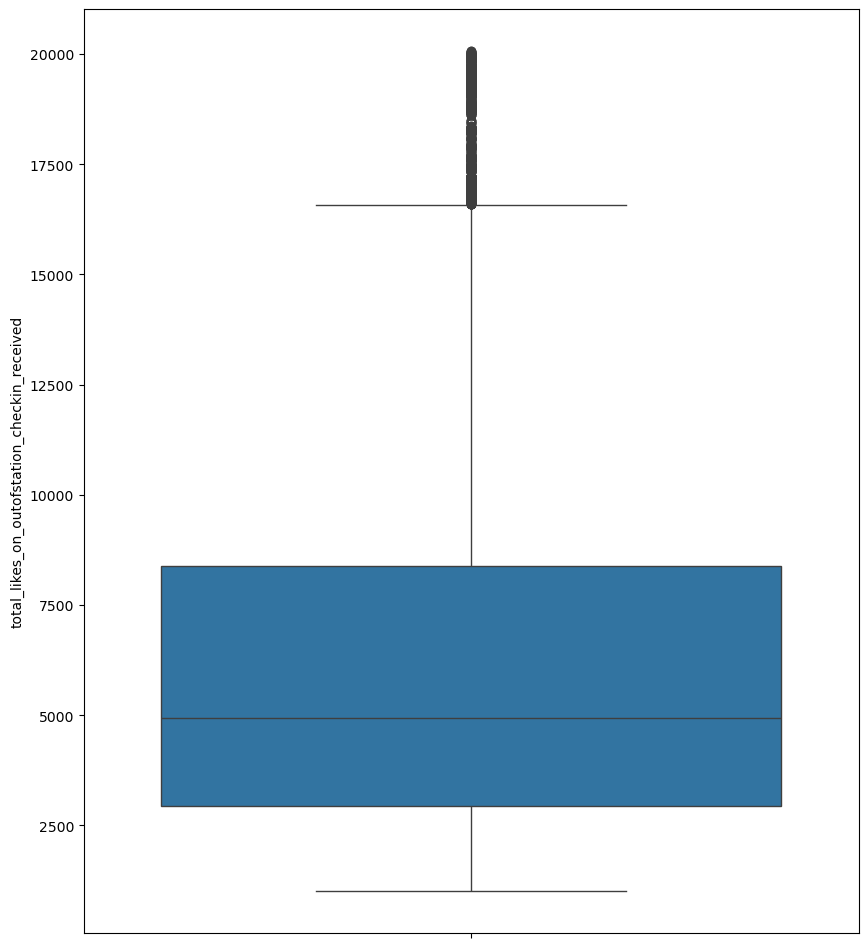

In [89]:
plt.figure(figsize=(10,12))
sns.boxplot(df['total_likes_on_outofstation_checkin_received'])

<Axes: ylabel='total_likes_on_outstation_checkin_given'>

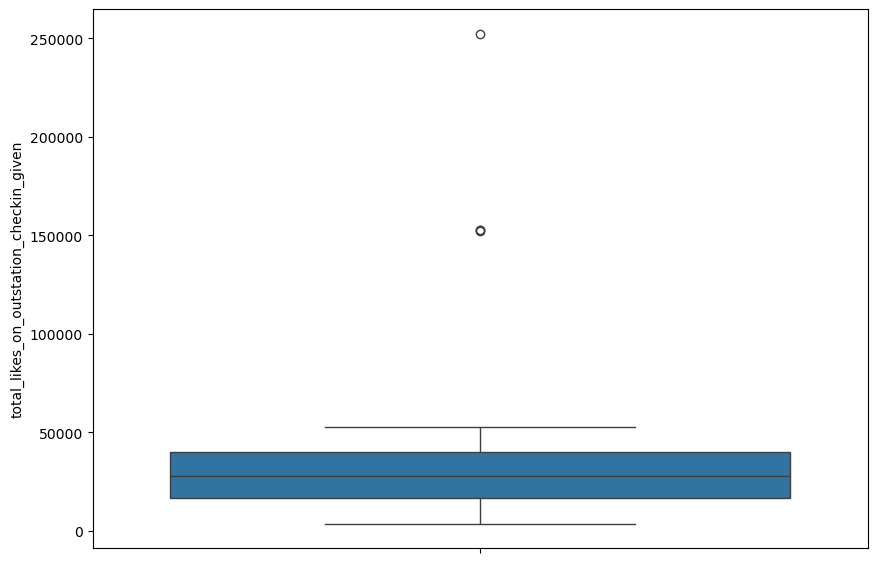

In [90]:
plt.figure(figsize=(10,7))
sns.boxplot(df['total_likes_on_outstation_checkin_given'])

In [91]:
df['Buy_ticket'].value_counts()

Buy_ticket
0    9860
1    1895
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of preferred devices')

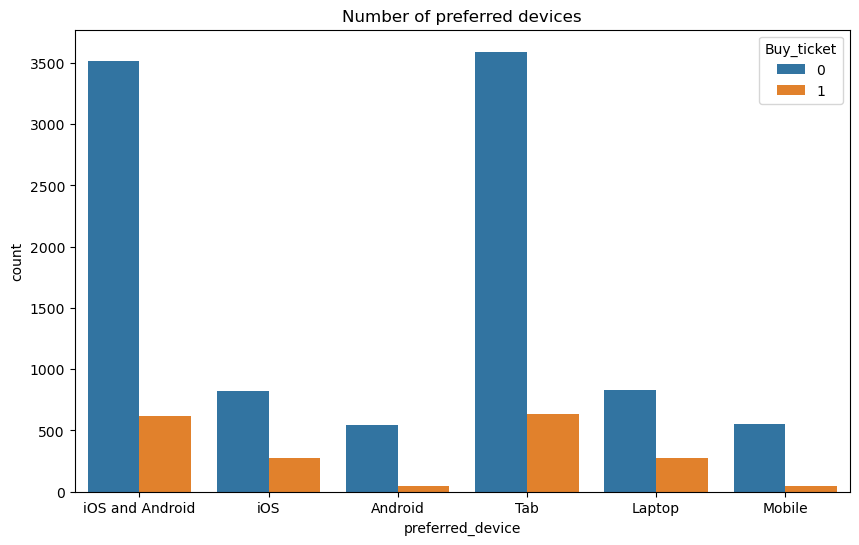

In [92]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='preferred_device', hue='Buy_ticket')
plt.title('Number of preferred devices')

## Data Preparation for modeling.

#### Since we need to build 2 models i.e. for 'Laptop' and 'Mobile', we 1st need to split the data as 'Laptop data' and 'Mobile data' and then for these 2 different datsets, we will build the models as such.

##### Assigning the labels as 1 for 'Laptop' 0 'Mobile'

In [93]:
df['preferred_device'] = df['preferred_device'].apply(lambda x: 1 if x =='Laptop' else 0)

In [94]:
df['preferred_device'].value_counts()

preferred_device
0    10647
1     1108
Name: count, dtype: int64

In [95]:
laptop_data = df[df['preferred_device']== 1]
mobile_data = df[df['preferred_device']== 0]

##### Now we will split the data into train and test datsets for 'laptop_data' and 'mobile_data'. First we will build the models for 'Laptop'

##### For Laptop dataset.

In [96]:
X_laptop = laptop_data.drop(['Buy_ticket'], axis=1)
y_laptop = laptop_data['Buy_ticket']

X_laptop = pd.get_dummies(X_laptop, drop_first=True)

x_train_laptop, x_test_laptop, y_train_laptop, y_test_laptop = train_test_split(X_laptop, y_laptop, test_size=0.3, random_state=42, stratify=y_laptop)

In [97]:
from collections import Counter

print(f'Class distribution before SMOTE:{Counter(y_laptop)}')

Class distribution before SMOTE:Counter({0: 832, 1: 276})


In [98]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_laptop, y_train_laptop)
print("Class Distribution After SMOTE:", Counter(y_train_smote))

Class Distribution After SMOTE: Counter({0: 582, 1: 582})


In [99]:
print("Shape of Training set : ", x_train_laptop.shape)
print("Shape of test set : ", x_train_laptop.shape)
print('-'*70)
print("Percentage of classes in training set:")
print(y_train_laptop.value_counts(normalize=True))
print('-'*70)
print("Percentage of classes in test set:")
print(y_test_laptop.value_counts(normalize=True))

Shape of Training set :  (775, 20)
Shape of test set :  (775, 20)
----------------------------------------------------------------------
Percentage of classes in training set:
Buy_ticket
0    0.750968
1    0.249032
Name: proportion, dtype: float64
----------------------------------------------------------------------
Percentage of classes in test set:
Buy_ticket
0    0.750751
1    0.249249
Name: proportion, dtype: float64


In [100]:
def model_performance_classification_sklearn(model, predictors, target):
   
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  
    recall = recall_score(target, pred)  
    precision = precision_score(target, pred)  
    f1 = f1_score(target, pred)  

    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [101]:
def confusion_matrix_sklearn(model, predictors, target):
    
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Bagging - Model Building and Hyperparameter Tuning

#### Bagging Classifier

In [102]:
bagging_classifier = BaggingClassifier(random_state=1) 
bagging_classifier.fit(x_train_laptop, y_train_laptop) 

BaggingClassifier(random_state=1)

#### Checking model performance on training set (Laptop)

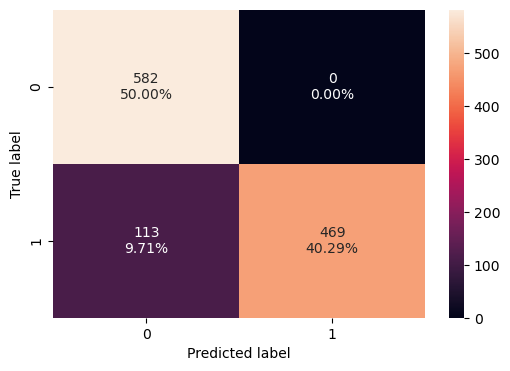

In [103]:
confusion_matrix_sklearn(bagging_classifier, x_train_smote, y_train_smote)

In [104]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, x_train_smote, y_train_smote)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.902921,0.805842,1.0,0.892483


#### Checking model performance on testing set (Laptop)

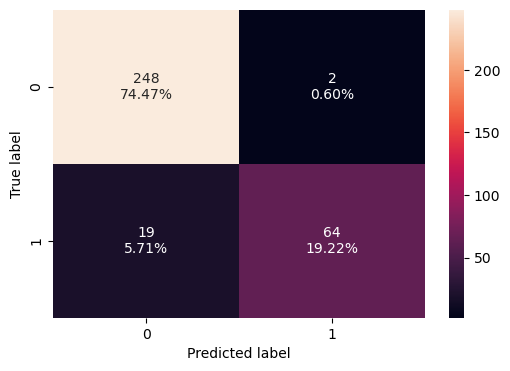

In [105]:
confusion_matrix_sklearn(bagging_classifier, x_test_laptop, y_test_laptop)

In [106]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, x_test_laptop, y_test_laptop) 
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.936937,0.771084,0.969697,0.85906


### 1) Hyperparameter Tuning - Bagging Classifier

In [107]:
bagging_estimator_tuned = BaggingClassifier(random_state=1)

parameters = {
    'n_estimators': [50, 100, 150], 
    'max_samples': [0.5, 0.7, 1.0]
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(estimator=bagging_estimator_tuned, 
                        param_grid=parameters, 
                        scoring=acc_scorer, 
                        cv=5)

grid_obj = grid_obj.fit(x_train_smote, y_train_smote)
bagging_estimator_tuned = grid_obj.best_estimator_
bagging_estimator_tuned.fit(x_train_smote, y_train_smote)

BaggingClassifier(max_samples=0.7, n_estimators=100, random_state=1)

#### Checking model performance on training set (Laptop)

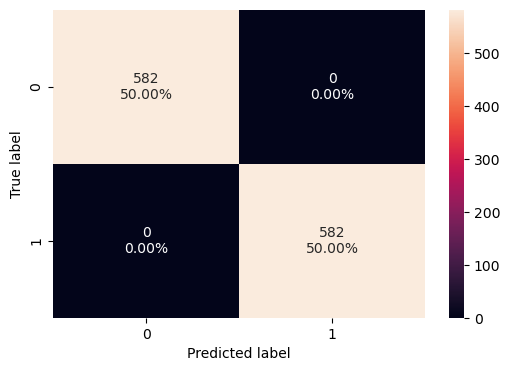

In [108]:
confusion_matrix_sklearn(bagging_estimator_tuned, x_train_smote, y_train_smote)

In [109]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, x_train_smote, y_train_smote)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set (Laptop)

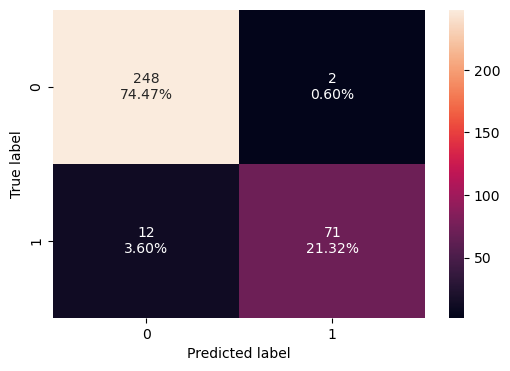

In [110]:
confusion_matrix_sklearn(bagging_estimator_tuned, x_test_laptop, y_test_laptop)

In [111]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, x_test_laptop, y_test_laptop) 
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.957958,0.855422,0.972603,0.910256


### 2) Random Forest 

In [112]:
rf_estimator = RandomForestClassifier(random_state=1, class_weight='balanced')
rf_estimator.fit(x_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set (Laptop)

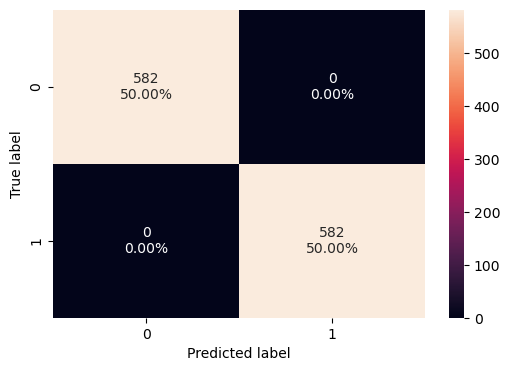

In [113]:
confusion_matrix_sklearn (rf_estimator, x_train_smote, y_train_smote)

In [114]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, x_train_smote, y_train_smote) 
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [115]:
print(metrics.classification_report(y_train_smote, rf_estimator.predict(x_train_smote)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       1.00      1.00      1.00       582

    accuracy                           1.00      1164
   macro avg       1.00      1.00      1.00      1164
weighted avg       1.00      1.00      1.00      1164



#### Checking model performance on test set (Laptop)

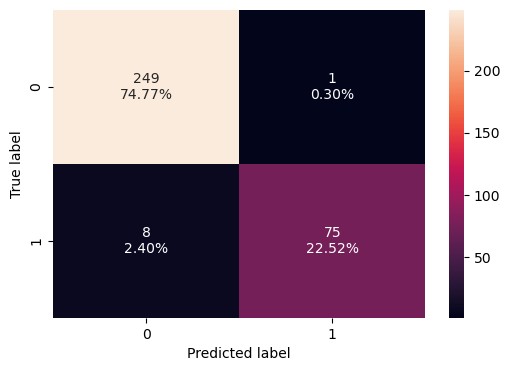

In [116]:
confusion_matrix_sklearn(rf_estimator, x_test_laptop, y_test_laptop)

In [117]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, x_test_laptop, y_test_laptop)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.972973,0.903614,0.986842,0.943396


In [118]:
print(metrics.classification_report(y_test_laptop, rf_estimator.predict(x_test_laptop)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       250
           1       0.99      0.90      0.94        83

    accuracy                           0.97       333
   macro avg       0.98      0.95      0.96       333
weighted avg       0.97      0.97      0.97       333



### Hyperparameter Tuning - Random Forest

In [119]:
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    'n_estimators': [50, 100, 150],
    'min_samples_split': [2, 5, 10],  
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(rf_tuned, param_grid=parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(x_train_laptop, y_train_laptop)

rf_tuned = grid_obj.best_estimator_

rf_tuned.fit(x_train_smote, y_train_smote)

RandomForestClassifier(n_estimators=150, oob_score=True, random_state=1)

#### Checking model performance on training set (Laptop)

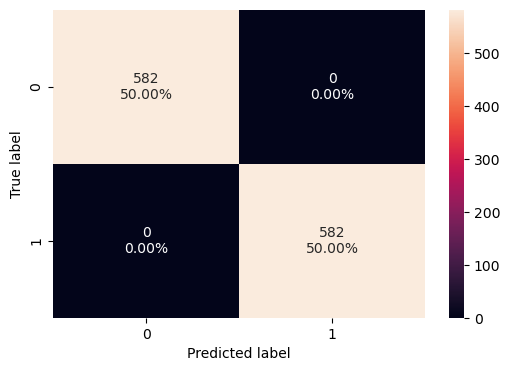

In [120]:
confusion_matrix_sklearn(rf_tuned, x_train_smote, y_train_smote)

In [121]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, x_train_smote, y_train_smote) 
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

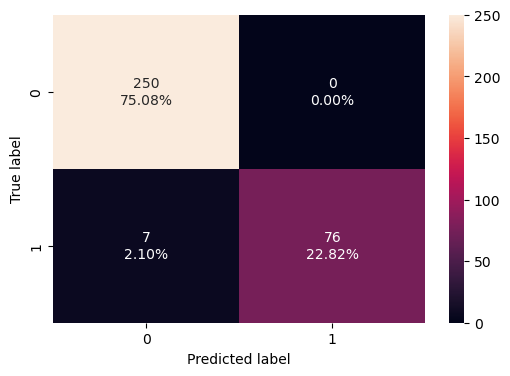

In [122]:
confusion_matrix_sklearn(rf_tuned, x_test_laptop, y_test_laptop)

In [123]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, x_test_laptop, y_test_laptop) 
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.978979,0.915663,1.0,0.955975


In [124]:
print(metrics.classification_report(y_test_laptop, rf_tuned.predict(x_test_laptop)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       250
           1       1.00      0.92      0.96        83

    accuracy                           0.98       333
   macro avg       0.99      0.96      0.97       333
weighted avg       0.98      0.98      0.98       333



## 3) Boosting - Model Building and Hyperparameter Tuning

In [125]:
ab_classifier = AdaBoostClassifier(random_state = 1)
ab_classifier.fit(x_train_smote, y_train_smote)

AdaBoostClassifier(random_state=1)

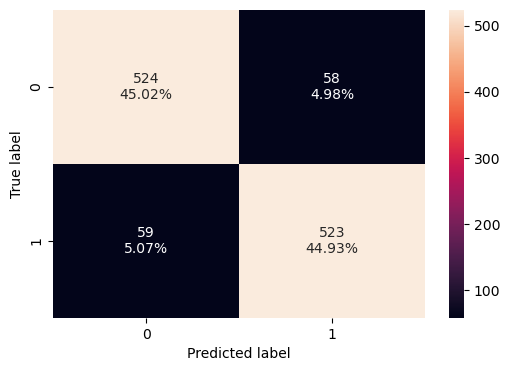

In [126]:
confusion_matrix_sklearn(ab_classifier, x_train_smote, y_train_smote)

In [127]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, x_train_smote, y_train_smote)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.899485,0.898625,0.900172,0.899398


In [128]:
print(metrics.classification_report(y_train_smote, ab_classifier.predict(x_train_smote)))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       582
           1       0.90      0.90      0.90       582

    accuracy                           0.90      1164
   macro avg       0.90      0.90      0.90      1164
weighted avg       0.90      0.90      0.90      1164



#### Checking model performance on test set

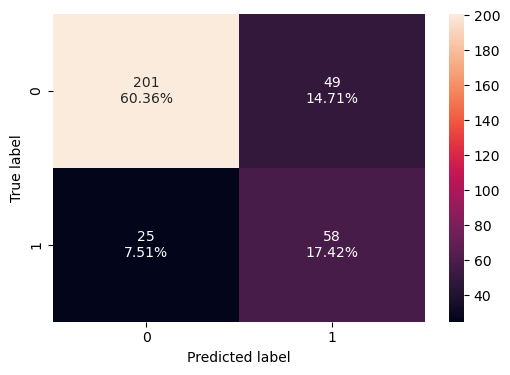

In [129]:
confusion_matrix_sklearn(ab_classifier, x_test_laptop, y_test_laptop)

In [130]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, x_test_laptop, y_test_laptop)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.777778,0.698795,0.542056,0.610526


In [131]:
print(metrics.classification_report(y_test_laptop, ab_classifier.predict(x_test_laptop)))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       250
           1       0.54      0.70      0.61        83

    accuracy                           0.78       333
   macro avg       0.72      0.75      0.73       333
weighted avg       0.80      0.78      0.79       333



### Hyperparameter Tuning - AdaBoost Classifier

In [132]:
abc_tuned = AdaBoostClassifier(random_state=1) 

parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],  
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(abc_tuned, param_grid=parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train_smote, y_train_smote)

abc_tuned = grid_obj.best_estimator_

abc_tuned.fit(x_train_smote, y_train_smote)

AdaBoostClassifier(n_estimators=150, random_state=1)

#### Checking model performance on training set

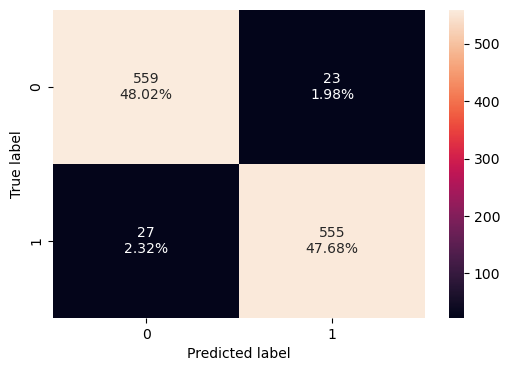

In [133]:
confusion_matrix_sklearn(abc_tuned, x_train_smote, y_train_smote)

In [134]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, x_train_smote, y_train_smote)
abc_tuned_model_train_perf 

,Accuracy,Recall,Precision,F1
0,0.957045,0.953608,0.960208,0.956897


In [135]:
print(metrics.classification_report(y_train_smote, abc_tuned.predict(x_train_smote)))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       582
           1       0.96      0.95      0.96       582

    accuracy                           0.96      1164
   macro avg       0.96      0.96      0.96      1164
weighted avg       0.96      0.96      0.96      1164



#### Checking model performance on test set

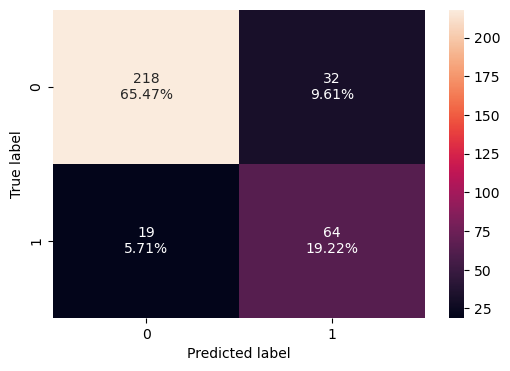

In [136]:
confusion_matrix_sklearn(abc_tuned, x_test_laptop, y_test_laptop)

In [137]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, x_test_laptop, y_test_laptop)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.846847,0.771084,0.666667,0.715084


In [138]:
print(metrics.classification_report(y_test_laptop, abc_tuned.predict(x_test_laptop)))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       250
           1       0.67      0.77      0.72        83

    accuracy                           0.85       333
   macro avg       0.79      0.82      0.81       333
weighted avg       0.86      0.85      0.85       333



### Decision Tree Model

In [139]:
model = DecisionTreeClassifier(criterion = 'gini')
model.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier()

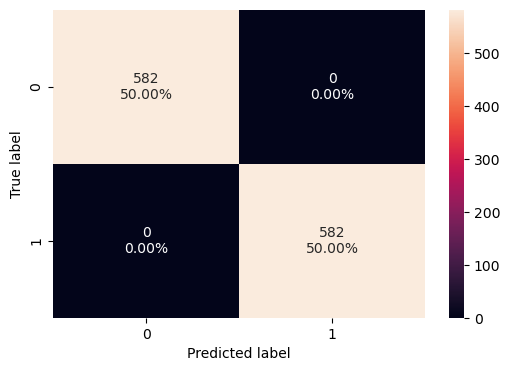

In [140]:
confusion_matrix_sklearn(model, x_train_smote, y_train_smote)

In [141]:
decision_tree_perf_train = model_performance_classification_sklearn(model, x_train_smote, y_train_smote)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [142]:
print(metrics.classification_report(y_train_smote, model.predict(x_train_smote)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       1.00      1.00      1.00       582

    accuracy                           1.00      1164
   macro avg       1.00      1.00      1.00      1164
weighted avg       1.00      1.00      1.00      1164



#### Checking model performance on test set

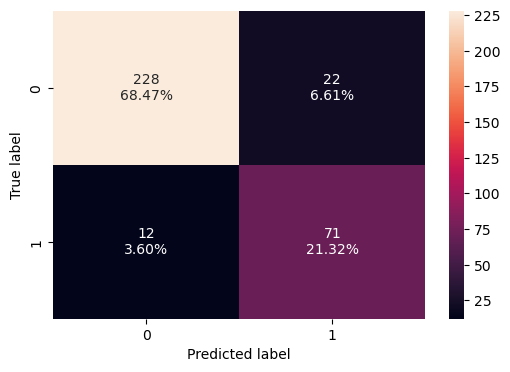

In [143]:
confusion_matrix_sklearn(model, x_test_laptop, y_test_laptop)

In [144]:
decision_tree_perf_test = model_performance_classification_sklearn(model, x_test_laptop, y_test_laptop)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.897898,0.855422,0.763441,0.806818


In [145]:
print(metrics.classification_report(y_test_laptop, model.predict(x_test_laptop)))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       250
           1       0.76      0.86      0.81        83

    accuracy                           0.90       333
   macro avg       0.86      0.88      0.87       333
weighted avg       0.90      0.90      0.90       333



### Hyperparameter Tuning - Decision Tree Model

In [146]:
model_tuned = DecisionTreeClassifier(criterion = 'gini')

parameters = {
    'max_depth': [None, 5, 10, 15, 20],  
    'min_samples_split': [2, 5, 10],
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(model_tuned, param_grid=parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train_smote, y_train_smote)

model_tuned = grid_obj.best_estimator_
model_tuned.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=15)

### Chechking on Training dataset.

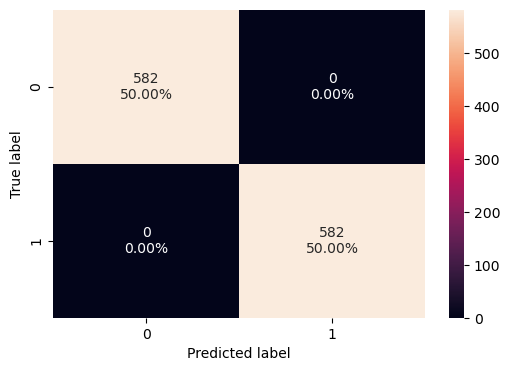

In [147]:
confusion_matrix_sklearn(model_tuned, x_train_smote, y_train_smote)

In [148]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(model_tuned, x_train_smote, y_train_smote)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [149]:
print(metrics.classification_report(y_train_smote, model_tuned.predict(x_train_smote)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       1.00      1.00      1.00       582

    accuracy                           1.00      1164
   macro avg       1.00      1.00      1.00      1164
weighted avg       1.00      1.00      1.00      1164



### Checking on testing dataset

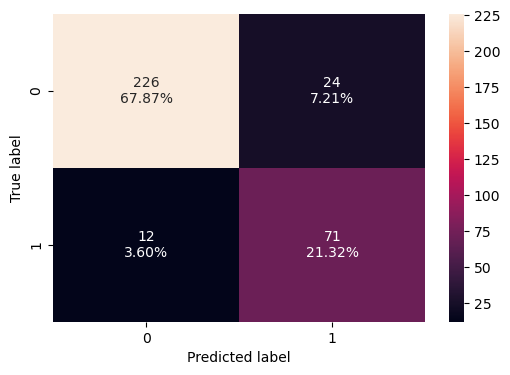

In [150]:
confusion_matrix_sklearn(model_tuned, x_test_laptop, y_test_laptop)

In [151]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(model_tuned, x_test_laptop, y_test_laptop)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.891892,0.855422,0.747368,0.797753


In [152]:
print(metrics.classification_report(y_test_laptop, model_tuned.predict(x_test_laptop)))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       250
           1       0.75      0.86      0.80        83

    accuracy                           0.89       333
   macro avg       0.85      0.88      0.86       333
weighted avg       0.90      0.89      0.89       333



### Comparing performance of different models.

In [153]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier
Accuracy,1.0,1.0,0.902921,1.0,1.0,1.0,0.899485,0.957045
Recall,1.0,1.0,0.805842,1.0,1.0,1.0,0.898625,0.953608
Precision,1.0,1.0,1.000000,1.0,1.0,1.0,0.900172,0.960208
F1,1.0,1.0,0.892483,1.0,1.0,1.0,0.899398,0.956897


In [154]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier
Accuracy,0.897898,0.891892,0.936937,0.957958,0.972973,0.978979,0.777778,0.846847
Recall,0.855422,0.855422,0.771084,0.855422,0.903614,0.915663,0.698795,0.771084
Precision,0.763441,0.747368,0.969697,0.972603,0.986842,1.000000,0.542056,0.666667
F1,0.806818,0.797753,0.859060,0.910256,0.943396,0.955975,0.610526,0.715084


### Most important features which helps us to predict the 'Buy_tickets' variable

In [155]:
gb_classifier = GradientBoostingClassifier(random_state=1)

parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7] 
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(gb_classifier, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train_smote, y_train_smote)
gb_classifier_tuned = grid_obj.best_estimator_
gb_classifier_tuned.fit(x_train_smote, y_train_smote)

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=200,
                           random_state=1)

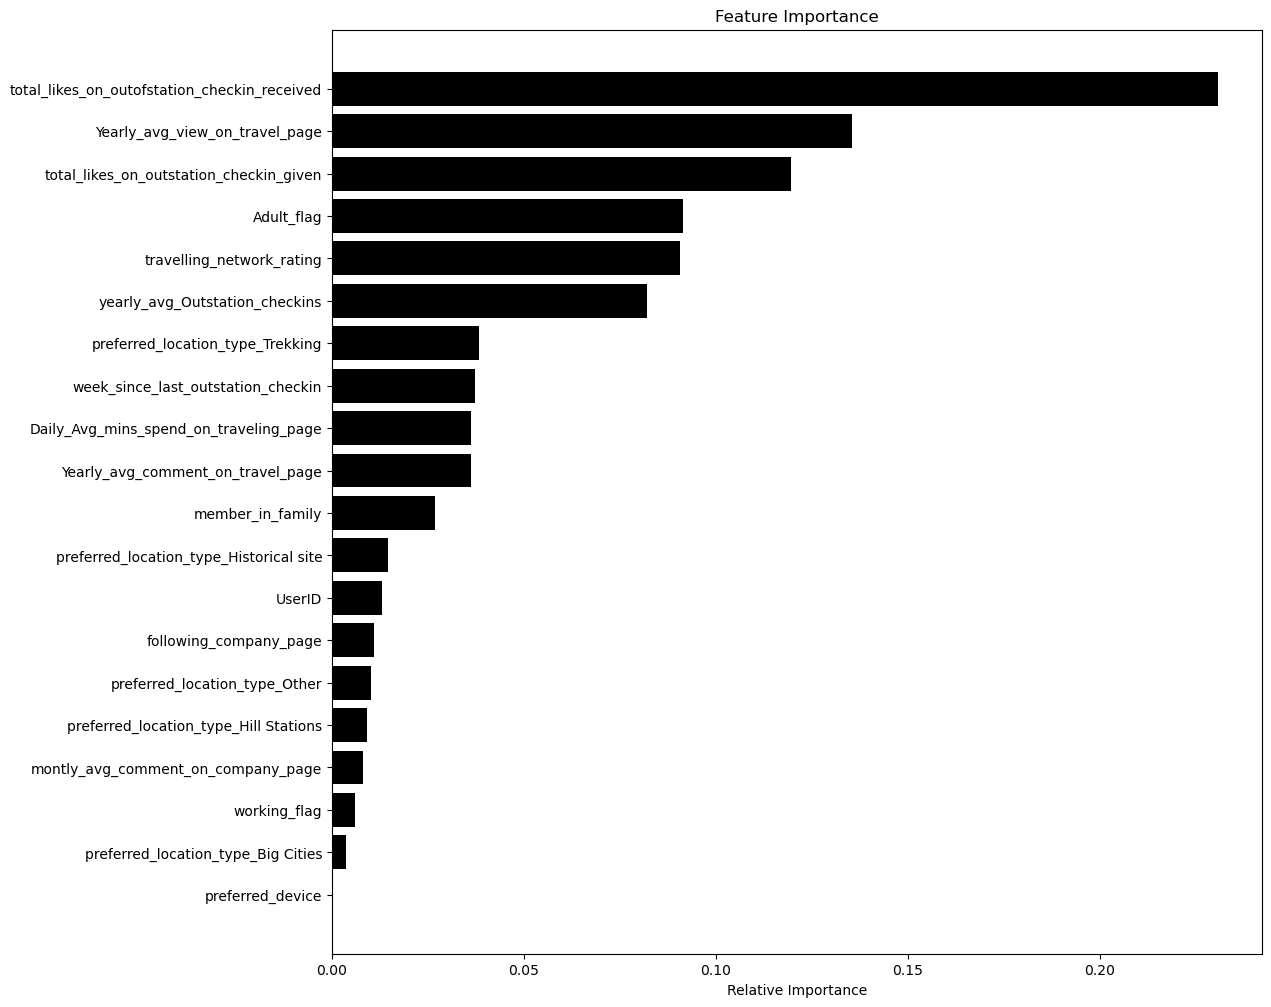

In [156]:
feature_name = x_train_smote.columns
importances = gb_classifier_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices] ,color="black", align="center")
plt.yticks(range(len(indices)), [feature_name[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### For Mobile dataset.

In [157]:
laptop_data = df[df['preferred_device']== 1]
mobile_data = df[df['preferred_device']== 0]

In [158]:
x_mobile = mobile_data.drop(['Buy_ticket'], axis=1)
y_mobile = mobile_data['Buy_ticket']

x_mobile = pd.get_dummies(x_mobile, drop_first=True)

x_train_mobile, x_test_mobile, y_train_mobile, y_test_mobile = train_test_split(x_mobile, y_mobile, test_size=0.3, random_state=42, stratify=y_mobile)

In [159]:
from collections import Counter

print(f'Class distribution before SMOTE:{Counter(y_mobile)}')

Class distribution before SMOTE:Counter({0: 9028, 1: 1619})


In [160]:
smote = SMOTE(random_state=42)
x_train_smote_mo, y_train_smote_mo = smote.fit_resample(x_train_mobile, y_train_mobile)
print("Class Distribution After SMOTE:", Counter(y_train_smote_mo))

Class Distribution After SMOTE: Counter({0: 6319, 1: 6319})


In [161]:
print("Shape of Training set : ", x_train_smote_mo.shape)
print("Shape of test set : ", y_train_smote_mo.shape)
print('-'*70)
print("Percentage of classes in training set:")
print(y_train_smote_mo.value_counts(normalize=True))
print('-'*70)
print("Percentage of classes in test set:")
print(y_test_mobile.value_counts(normalize=True))

Shape of Training set :  (12638, 25)
Shape of test set :  (12638,)
----------------------------------------------------------------------
Percentage of classes in training set:
Buy_ticket
0    0.5
1    0.5
Name: proportion, dtype: float64
----------------------------------------------------------------------
Percentage of classes in test set:
Buy_ticket
0    0.847887
1    0.152113
Name: proportion, dtype: float64


In [162]:
def model_performance_classification_sklearn(model, predictors, target):
   
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  
    recall = recall_score(target, pred)  
    precision = precision_score(target, pred)  
    f1 = f1_score(target, pred)  

    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [163]:
def confusion_matrix_sklearn(model, predictors, target):
    
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")

## Bagging - Model Building and Hyperparameter Tuning

#### Bagging Classifier

#### Checking model performance on training set (Mobile)

In [164]:
bagging_classifier = BaggingClassifier(random_state=1) 
bagging_classifier.fit(x_train_smote_mo, y_train_smote_mo) 

BaggingClassifier(random_state=1)

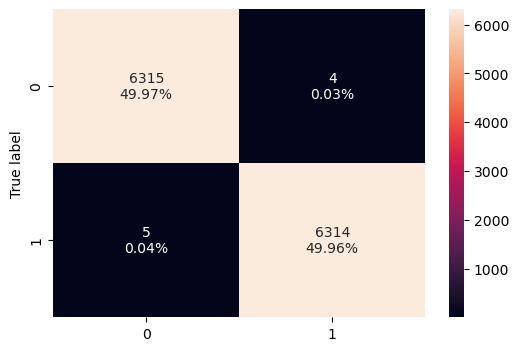

In [165]:
confusion_matrix_sklearn(bagging_classifier, x_train_smote_mo, y_train_smote_mo)

In [166]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, x_train_smote_mo, y_train_smote_mo) 
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999288,0.999209,0.999367,0.999288


In [167]:
print(metrics.classification_report(y_train_smote_mo, bagging_classifier.predict(x_train_smote_mo)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6319
           1       1.00      1.00      1.00      6319

    accuracy                           1.00     12638
   macro avg       1.00      1.00      1.00     12638
weighted avg       1.00      1.00      1.00     12638



#### Checking model performance on testing set (Mobile)

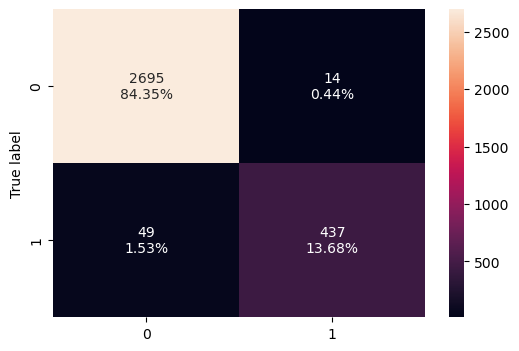

In [168]:
confusion_matrix_sklearn(bagging_classifier, x_test_mobile, y_test_mobile)

In [169]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, x_test_mobile, y_test_mobile)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.980282,0.899177,0.968958,0.932764


In [170]:
print(metrics.classification_report(y_test_mobile, bagging_classifier.predict(x_test_mobile)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2709
           1       0.97      0.90      0.93       486

    accuracy                           0.98      3195
   macro avg       0.98      0.95      0.96      3195
weighted avg       0.98      0.98      0.98      3195



### 1) Hyperparameter Tuning - Bagging Classifier

In [171]:
bagging_estimator_tuned = BaggingClassifier(random_state=1)

parameters = {
    'n_estimators': [50, 100, 150], 
    'max_samples': [0.5, 0.7, 1.0]
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(estimator=bagging_estimator_tuned, 
                        param_grid=parameters, 
                        scoring=acc_scorer, 
                        cv=5)

grid_obj = grid_obj.fit(x_train_smote_mo, y_train_smote_mo)
bagging_estimator_tuned = grid_obj.best_estimator_
bagging_estimator_tuned.fit(x_train_smote_mo, y_train_smote_mo)

BaggingClassifier(n_estimators=150, random_state=1)

#### Checking model performance on training set (Mobile)

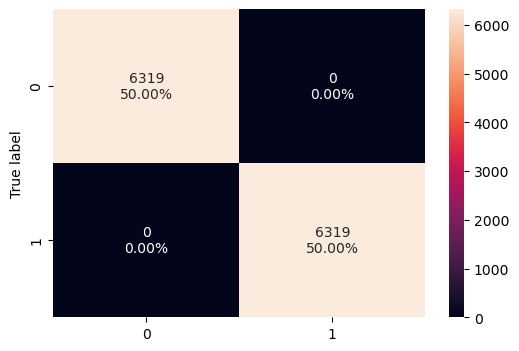

In [172]:
confusion_matrix_sklearn(bagging_estimator_tuned, x_train_smote_mo, y_train_smote_mo)

In [173]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, x_train_smote_mo, y_train_smote_mo)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [174]:
print(metrics.classification_report(y_train_smote_mo, bagging_estimator_tuned.predict(x_train_smote_mo)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6319
           1       1.00      1.00      1.00      6319

    accuracy                           1.00     12638
   macro avg       1.00      1.00      1.00     12638
weighted avg       1.00      1.00      1.00     12638



#### Checking model performance on test set (Mobile)

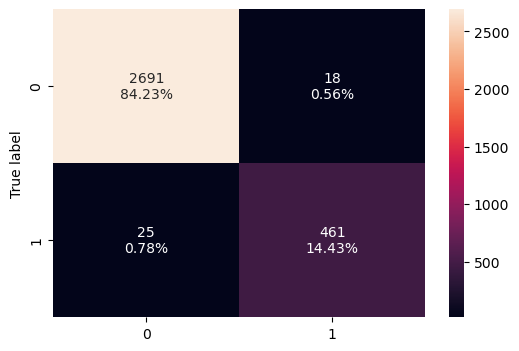

In [175]:
confusion_matrix_sklearn(bagging_estimator_tuned, x_test_mobile, y_test_mobile)

In [176]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, x_test_mobile, y_test_mobile) 
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.986541,0.94856,0.962422,0.95544


In [177]:
print(metrics.classification_report(y_test_mobile, bagging_estimator_tuned.predict(x_test_mobile)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2709
           1       0.96      0.95      0.96       486

    accuracy                           0.99      3195
   macro avg       0.98      0.97      0.97      3195
weighted avg       0.99      0.99      0.99      3195



### 2) Random Forest 

In [178]:
rf_estimator = RandomForestClassifier(random_state=1, class_weight='balanced')
rf_estimator.fit(x_train_smote_mo, y_train_smote_mo)

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set (Mobile)

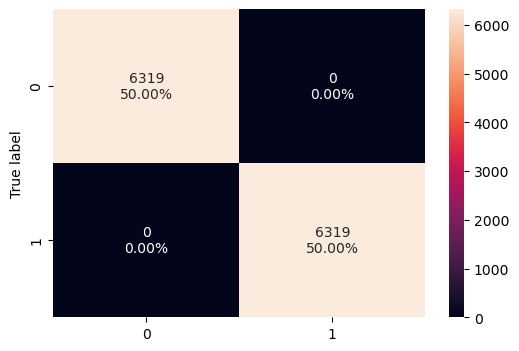

In [179]:
confusion_matrix_sklearn (rf_estimator, x_train_smote_mo, y_train_smote_mo)

In [180]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, x_train_smote_mo, y_train_smote_mo) 
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [181]:
print(metrics.classification_report(y_train_smote_mo, rf_estimator.predict(x_train_smote_mo)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6319
           1       1.00      1.00      1.00      6319

    accuracy                           1.00     12638
   macro avg       1.00      1.00      1.00     12638
weighted avg       1.00      1.00      1.00     12638



#### Checking model performance on test set (Mobile)

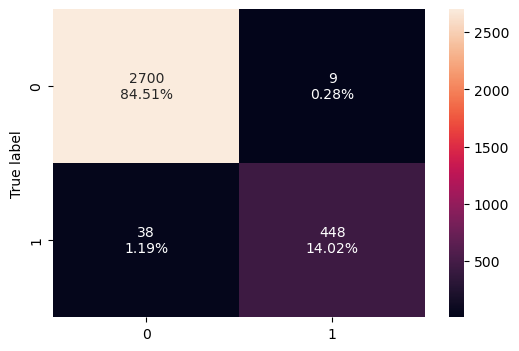

In [182]:
confusion_matrix_sklearn(rf_estimator, x_test_mobile, y_test_mobile)

In [183]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, x_test_mobile, y_test_mobile) 
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.98529,0.921811,0.980306,0.950159


In [184]:
print(metrics.classification_report(y_test_mobile, rf_estimator.predict(x_test_mobile)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2709
           1       0.98      0.92      0.95       486

    accuracy                           0.99      3195
   macro avg       0.98      0.96      0.97      3195
weighted avg       0.99      0.99      0.99      3195



### Hyperparameter Tuning - Random Forest

In [185]:
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    'n_estimators': [50, 100, 150],
    'min_samples_split': [2, 5, 10],  
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(rf_tuned, param_grid=parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(x_train_smote_mo, y_train_smote_mo)

rf_tuned = grid_obj.best_estimator_

rf_tuned.fit(x_train_smote_mo, y_train_smote_mo)

RandomForestClassifier(n_estimators=150, oob_score=True, random_state=1)

#### Checking model performance on training set (Mobile)

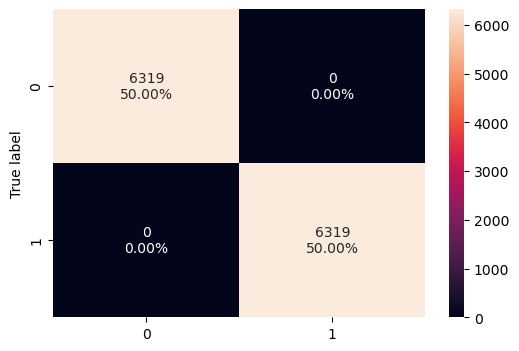

In [186]:
confusion_matrix_sklearn(rf_tuned, x_train_smote_mo, y_train_smote_mo)

In [187]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, x_train_smote_mo, y_train_smote_mo) 
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set (Mobile)

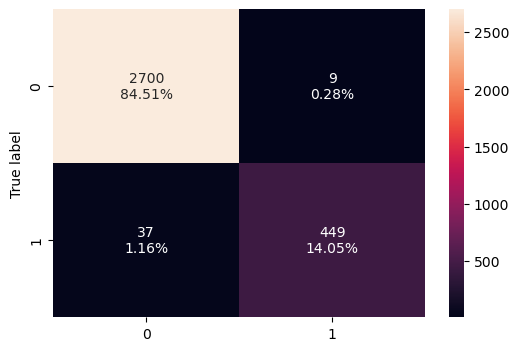

In [188]:
confusion_matrix_sklearn(rf_tuned, x_test_mobile, y_test_mobile)

In [189]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, x_test_mobile, y_test_mobile) 
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.985603,0.923868,0.980349,0.951271


In [190]:
print(metrics.classification_report(y_test_mobile, rf_tuned.predict(x_test_mobile)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2709
           1       0.98      0.92      0.95       486

    accuracy                           0.99      3195
   macro avg       0.98      0.96      0.97      3195
weighted avg       0.99      0.99      0.99      3195



## 3) Boosting - Model Building and Hyperparameter Tuning

In [191]:
ab_classifier = AdaBoostClassifier(random_state = 1)
ab_classifier.fit(x_train_smote_mo, y_train_smote_mo)

AdaBoostClassifier(random_state=1)

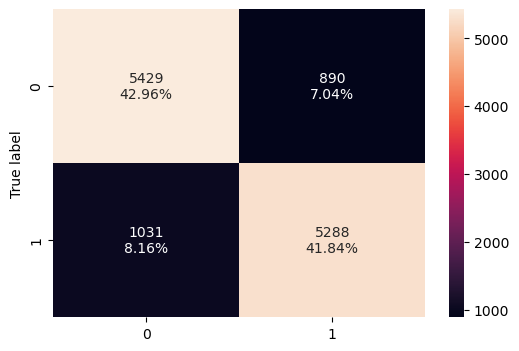

In [192]:
confusion_matrix_sklearn(ab_classifier, x_train_smote_mo, y_train_smote_mo)

In [193]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, x_train_smote_mo, y_train_smote_mo)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.847998,0.836841,0.85594,0.846283


In [194]:
print(metrics.classification_report(y_train_smote_mo, ab_classifier.predict(x_train_smote_mo)))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      6319
           1       0.86      0.84      0.85      6319

    accuracy                           0.85     12638
   macro avg       0.85      0.85      0.85     12638
weighted avg       0.85      0.85      0.85     12638



#### Checking model performance on test set

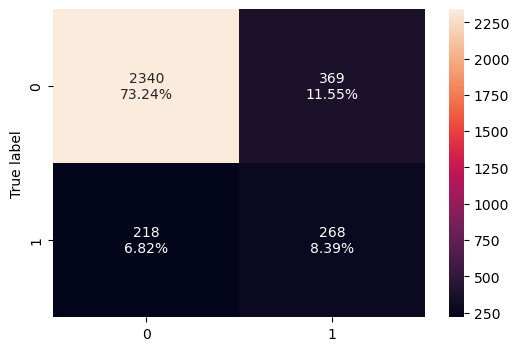

In [195]:
confusion_matrix_sklearn(ab_classifier, x_test_mobile, y_test_mobile)

In [196]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, x_test_mobile, y_test_mobile)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.816275,0.55144,0.420722,0.477293


In [197]:
print(metrics.classification_report(y_test_mobile, ab_classifier.predict(x_test_mobile)))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      2709
           1       0.42      0.55      0.48       486

    accuracy                           0.82      3195
   macro avg       0.67      0.71      0.68      3195
weighted avg       0.84      0.82      0.83      3195



### Hyperparameter Tuning - AdaBoost Classifier

In [198]:
abc_tuned = AdaBoostClassifier(random_state=1) 

parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],  
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(abc_tuned, param_grid=parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train_smote_mo, y_train_smote_mo)

abc_tuned = grid_obj.best_estimator_

abc_tuned.fit(x_train_smote_mo, y_train_smote_mo)

AdaBoostClassifier(n_estimators=100, random_state=1)

#### Checking model performance on training set (Mobile)

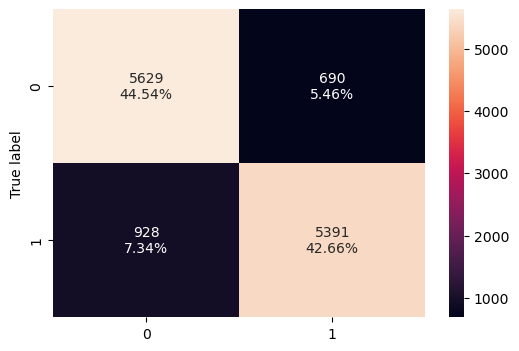

In [199]:
confusion_matrix_sklearn(abc_tuned, x_train_smote_mo, y_train_smote_mo)

In [200]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, x_train_smote_mo, y_train_smote_mo)
abc_tuned_model_train_perf 

,Accuracy,Recall,Precision,F1
0,0.871973,0.853141,0.886532,0.869516


In [201]:
print(metrics.classification_report(y_train_smote_mo, abc_tuned.predict(x_train_smote_mo)))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      6319
           1       0.89      0.85      0.87      6319

    accuracy                           0.87     12638
   macro avg       0.87      0.87      0.87     12638
weighted avg       0.87      0.87      0.87     12638



#### Checking model performance on test set (Mobile)

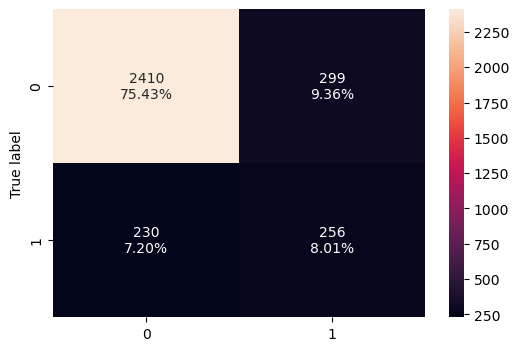

In [202]:
confusion_matrix_sklearn(abc_tuned, x_test_mobile, y_test_mobile)

In [203]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, x_test_mobile, y_test_mobile)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.834429,0.526749,0.461261,0.491835


In [204]:
print(metrics.classification_report(y_test_mobile, abc_tuned.predict(x_test_mobile)))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2709
           1       0.46      0.53      0.49       486

    accuracy                           0.83      3195
   macro avg       0.69      0.71      0.70      3195
weighted avg       0.84      0.83      0.84      3195



## 4) Decision Tree Model

#### Checking model performance on train set (Mobile)

In [205]:
model = DecisionTreeClassifier(criterion = 'gini')
model.fit(x_train_smote_mo, y_train_smote_mo)

DecisionTreeClassifier()

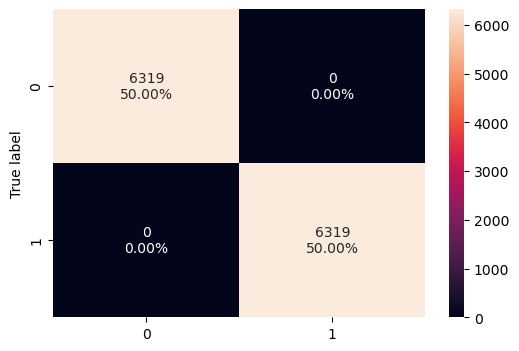

In [206]:
confusion_matrix_sklearn(model, x_train_smote_mo, y_train_smote_mo)

In [207]:
decision_tree_perf_train = model_performance_classification_sklearn(model, x_train_smote_mo, y_train_smote_mo)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [208]:
print(metrics.classification_report(y_train_smote_mo, model.predict(x_train_smote_mo)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6319
           1       1.00      1.00      1.00      6319

    accuracy                           1.00     12638
   macro avg       1.00      1.00      1.00     12638
weighted avg       1.00      1.00      1.00     12638



#### Checking model performance on test set (Mobile)

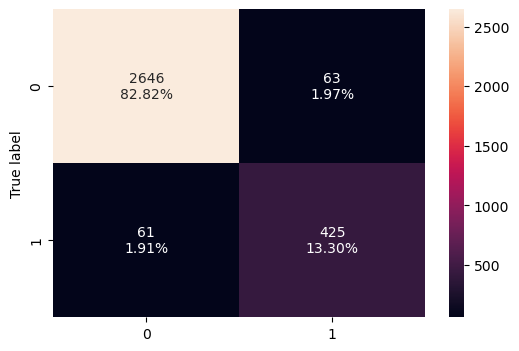

In [209]:
confusion_matrix_sklearn(model, x_test_mobile, y_test_mobile)

In [210]:
decision_tree_perf_test = model_performance_classification_sklearn(model, x_test_mobile, y_test_mobile)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.961189,0.874486,0.870902,0.87269


In [211]:
print(metrics.classification_report(y_test_mobile, model.predict(x_test_mobile)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2709
           1       0.87      0.87      0.87       486

    accuracy                           0.96      3195
   macro avg       0.92      0.93      0.92      3195
weighted avg       0.96      0.96      0.96      3195



#### Hyperparameter Tuning - Decision Tree Model

In [212]:
model_tuned = DecisionTreeClassifier(criterion = 'gini')

parameters = {
    'max_depth': [None, 5, 10, 15, 20],  
    'min_samples_split': [2, 5, 10],
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(model_tuned, param_grid=parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train_smote_mo, y_train_smote_mo)

model_tuned = grid_obj.best_estimator_
model_tuned.fit(x_train_smote_mo, y_train_smote_mo)

DecisionTreeClassifier(max_depth=20)

### Chechking on Training dataset (Mobile)

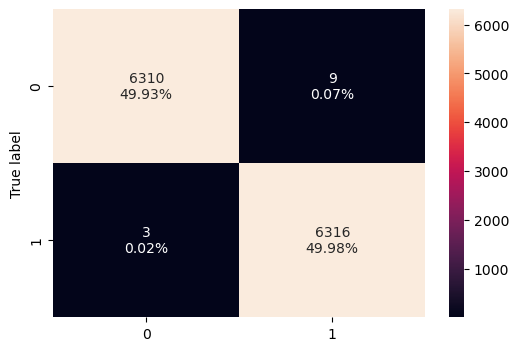

In [213]:
confusion_matrix_sklearn(model_tuned, x_train_smote_mo, y_train_smote_mo)

In [214]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(model_tuned, x_train_smote_mo, y_train_smote_mo)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.99905,0.999525,0.998577,0.999051


### Checking on testing dataset (Mobile)

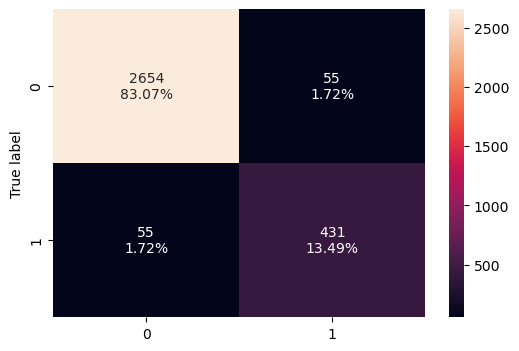

In [215]:
confusion_matrix_sklearn(model_tuned, x_test_mobile, y_test_mobile)

In [216]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(model_tuned, x_test_mobile, y_test_mobile)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.965571,0.886831,0.886831,0.886831


In [217]:
print(metrics.classification_report(y_test_mobile, model_tuned.predict(x_test_mobile)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2709
           1       0.89      0.89      0.89       486

    accuracy                           0.97      3195
   macro avg       0.93      0.93      0.93      3195
weighted avg       0.97      0.97      0.97      3195



### Comparing performance of different models. (Mobile)

In [218]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier
Accuracy,1.0,0.999050,0.999288,1.0,1.0,1.0,0.847998,0.871973
Recall,1.0,0.999525,0.999209,1.0,1.0,1.0,0.836841,0.853141
Precision,1.0,0.998577,0.999367,1.0,1.0,1.0,0.855940,0.886532
F1,1.0,0.999051,0.999288,1.0,1.0,1.0,0.846283,0.869516


In [219]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier
Accuracy,0.961189,0.965571,0.980282,0.986541,0.985290,0.985603,0.816275,0.834429
Recall,0.874486,0.886831,0.899177,0.948560,0.921811,0.923868,0.551440,0.526749
Precision,0.870902,0.886831,0.968958,0.962422,0.980306,0.980349,0.420722,0.461261
F1,0.872690,0.886831,0.932764,0.955440,0.950159,0.951271,0.477293,0.491835


### Most important features which helps us to predict the 'Buy_tickets' variable (Mobile)

In [220]:
gb_classifier = GradientBoostingClassifier(random_state=1)

parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7] 
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(gb_classifier, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train_smote_mo, y_train_smote_mo)
gb_classifier_tuned = grid_obj.best_estimator_
gb_classifier_tuned.fit(x_train_smote_mo, y_train_smote_mo)

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, random_state=1)

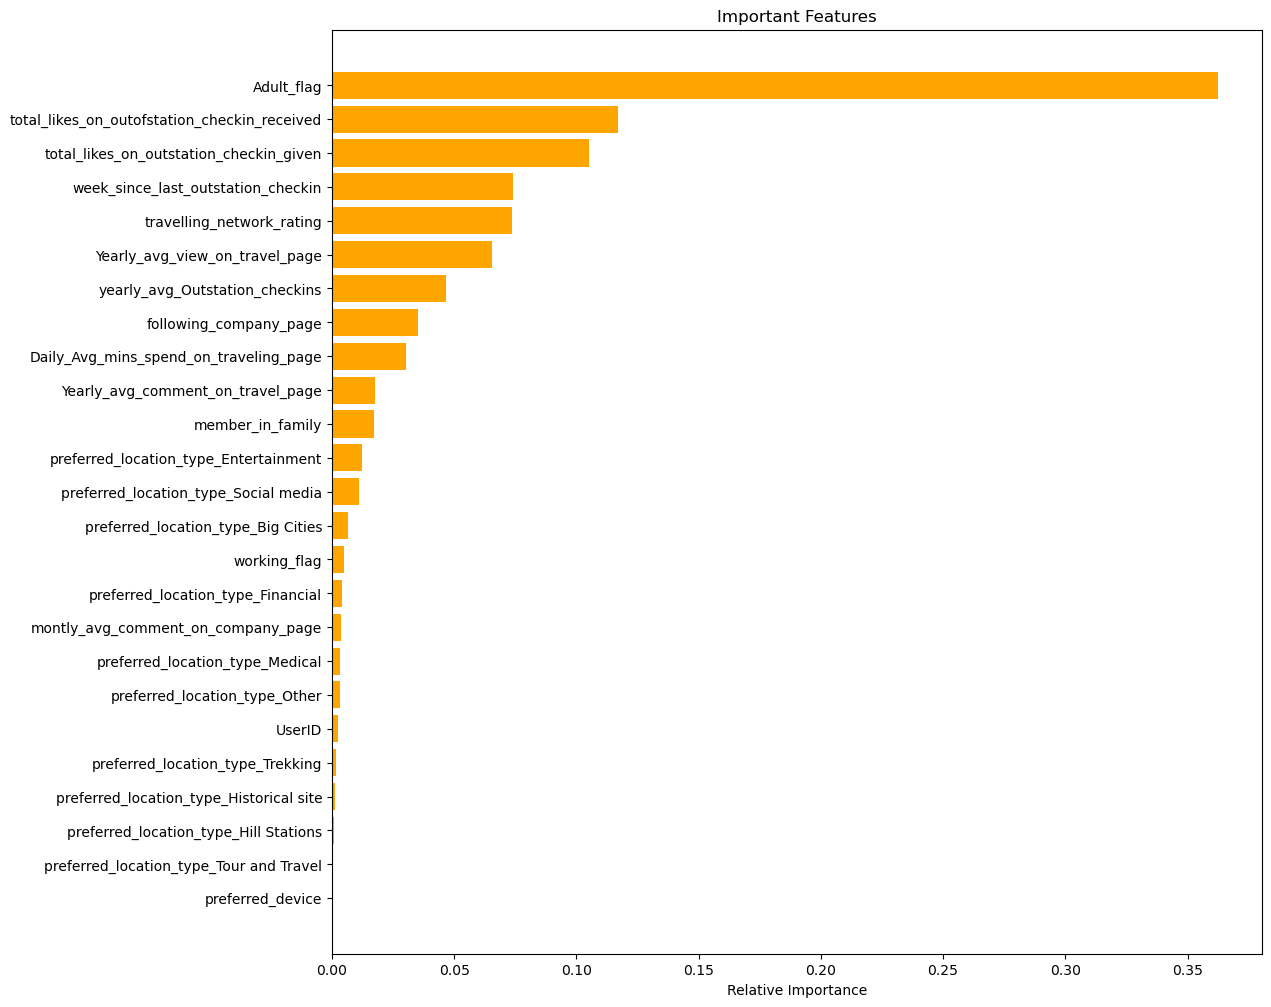

In [221]:
feature_name = x_train_smote_mo.columns
importances = gb_classifier_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Important Features')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_name[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()